Objective:
    
We need to find out the weak areas where we can work to make more profits.

In [2]:
# Importing Necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")


In [3]:
# Read and understand the dataset and check the first five rows
df_superstore=pd.read_csv("SampleSuperstore.csv")
df_superstore.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df_superstore.tail(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
# Checking the rows and columns of the dataset
df_superstore.shape

(9994, 13)

In [6]:
df_superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#Type of Category
df_superstore["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
#Type of Sub-Category
df_superstore["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [9]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
# Calculating the missing values in the dataset
(df_superstore.isnull().mean()*100).sort_values(ascending=False)

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [11]:
# we dont have any missing values, so there is certain columns that is not efficient to the dataset
df_superstore.drop(['Postal Code'], axis=1, inplace=True)

In [12]:
df_superstore.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164



Number of products in each category

In [13]:
df_superstore["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [14]:
#Total number of products in Categories
df_superstore["Category"].value_counts().sum()

9994

In [15]:
df_superstore["Sub-Category"].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

Unique data in each column

In [15]:
for col in df_superstore:
    print(df_superstore[col].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 

No. of duplicate values in data

In [16]:
df_superstore.duplicated().sum()

50

In [17]:
df_superstore.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Data Visualization

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

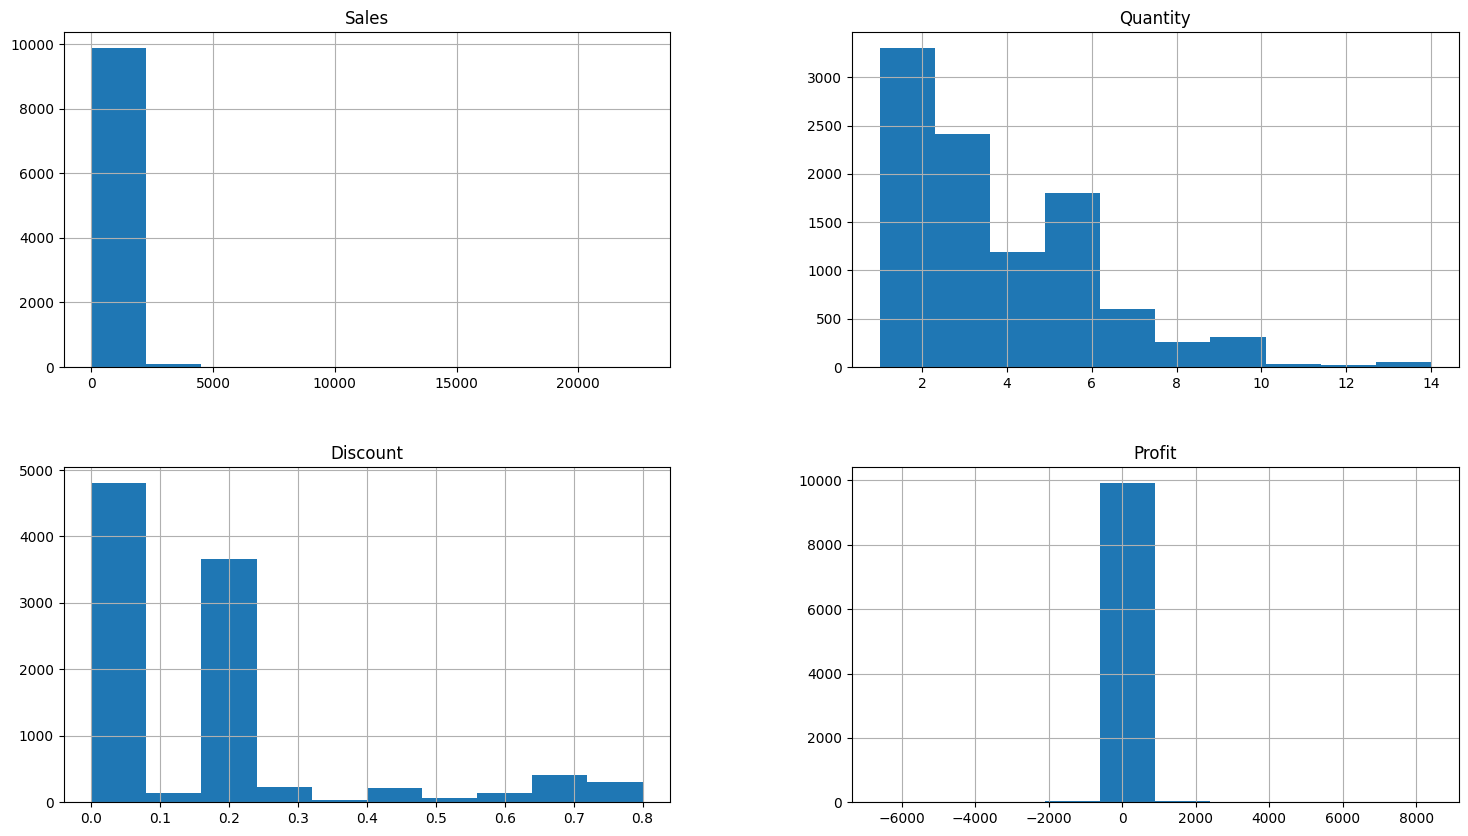

In [20]:
df_superstore.hist(bins=10, figsize=(18,10))

Bar Plot Between Sub-category vs Category

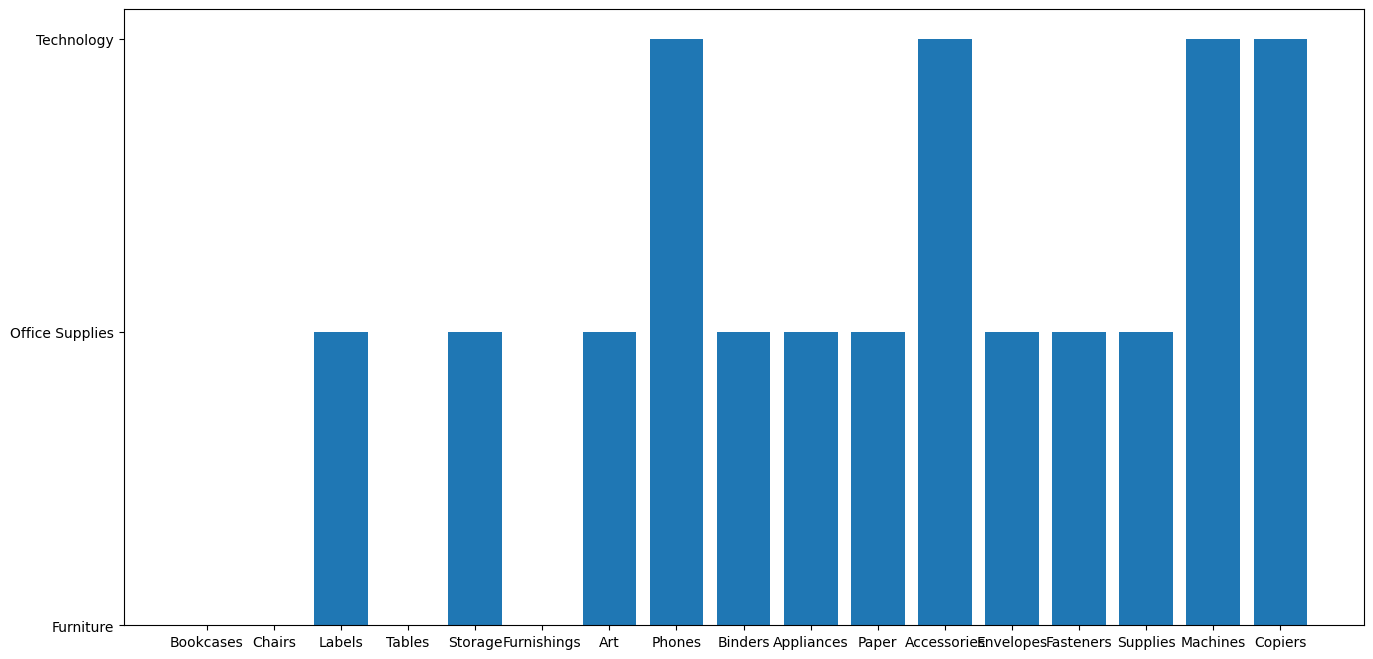

In [22]:
plt.figure(figsize=(16,8))
plt.bar("Sub-Category","Category", data=df_superstore)
plt.show()

1. In Furniture Categorythe frequency of individual item is very less.
2.In Office supplies the frequency of individual item is medium.
3. In Technology the frequency of individual item is high.

Pie Chart for Sub-Category

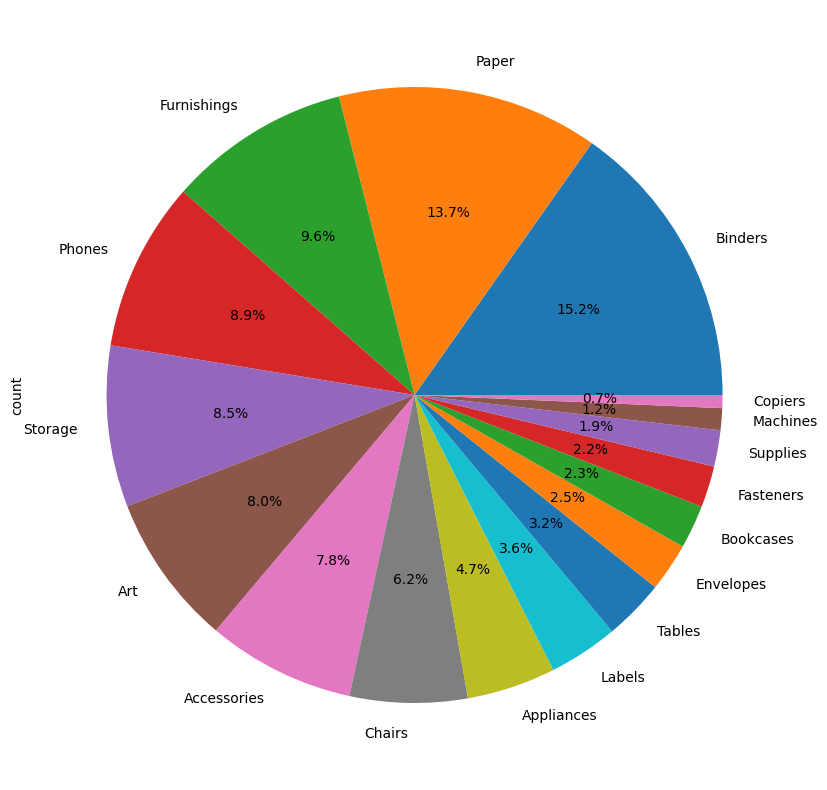

In [24]:
plt.figure(figsize=(12,10))
df_superstore["Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The samplestore data has wide variety of supplies in Binders and Paper's

State Vs Count

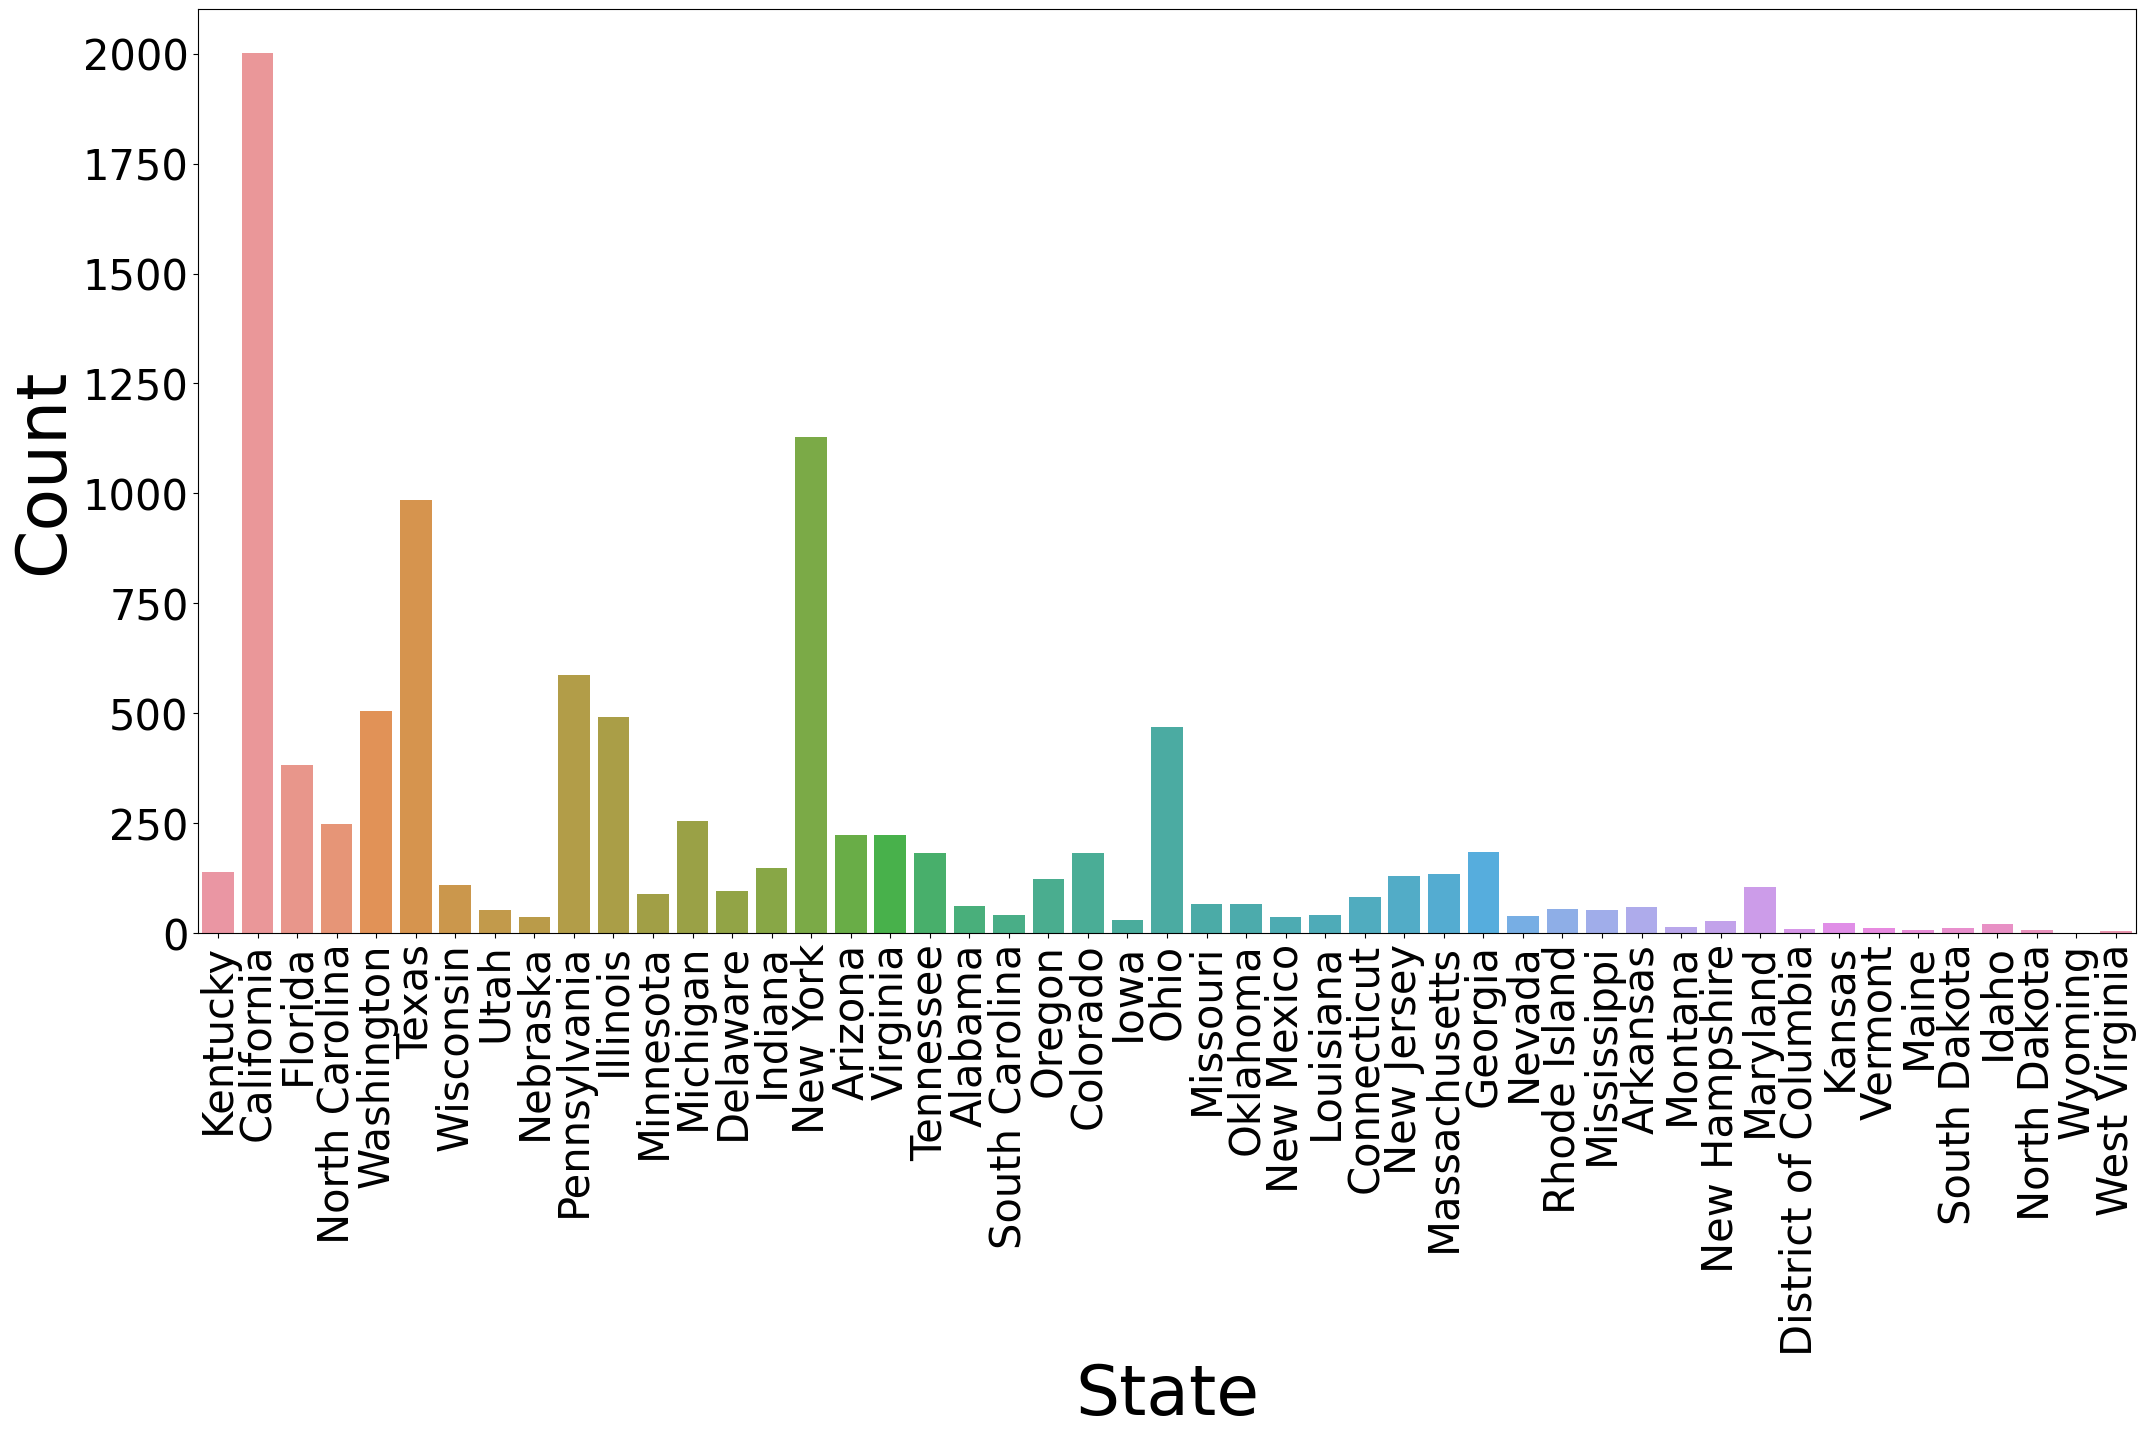

In [32]:
#State
plt.figure(figsize=(25,12))
Data=sns.countplot(x="State", data=df_superstore)
Data.set_xticklabels(Data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('State', fontsize=50) 
plt.ylabel('Count', fontsize=50)
plt.show()

State wise Sales

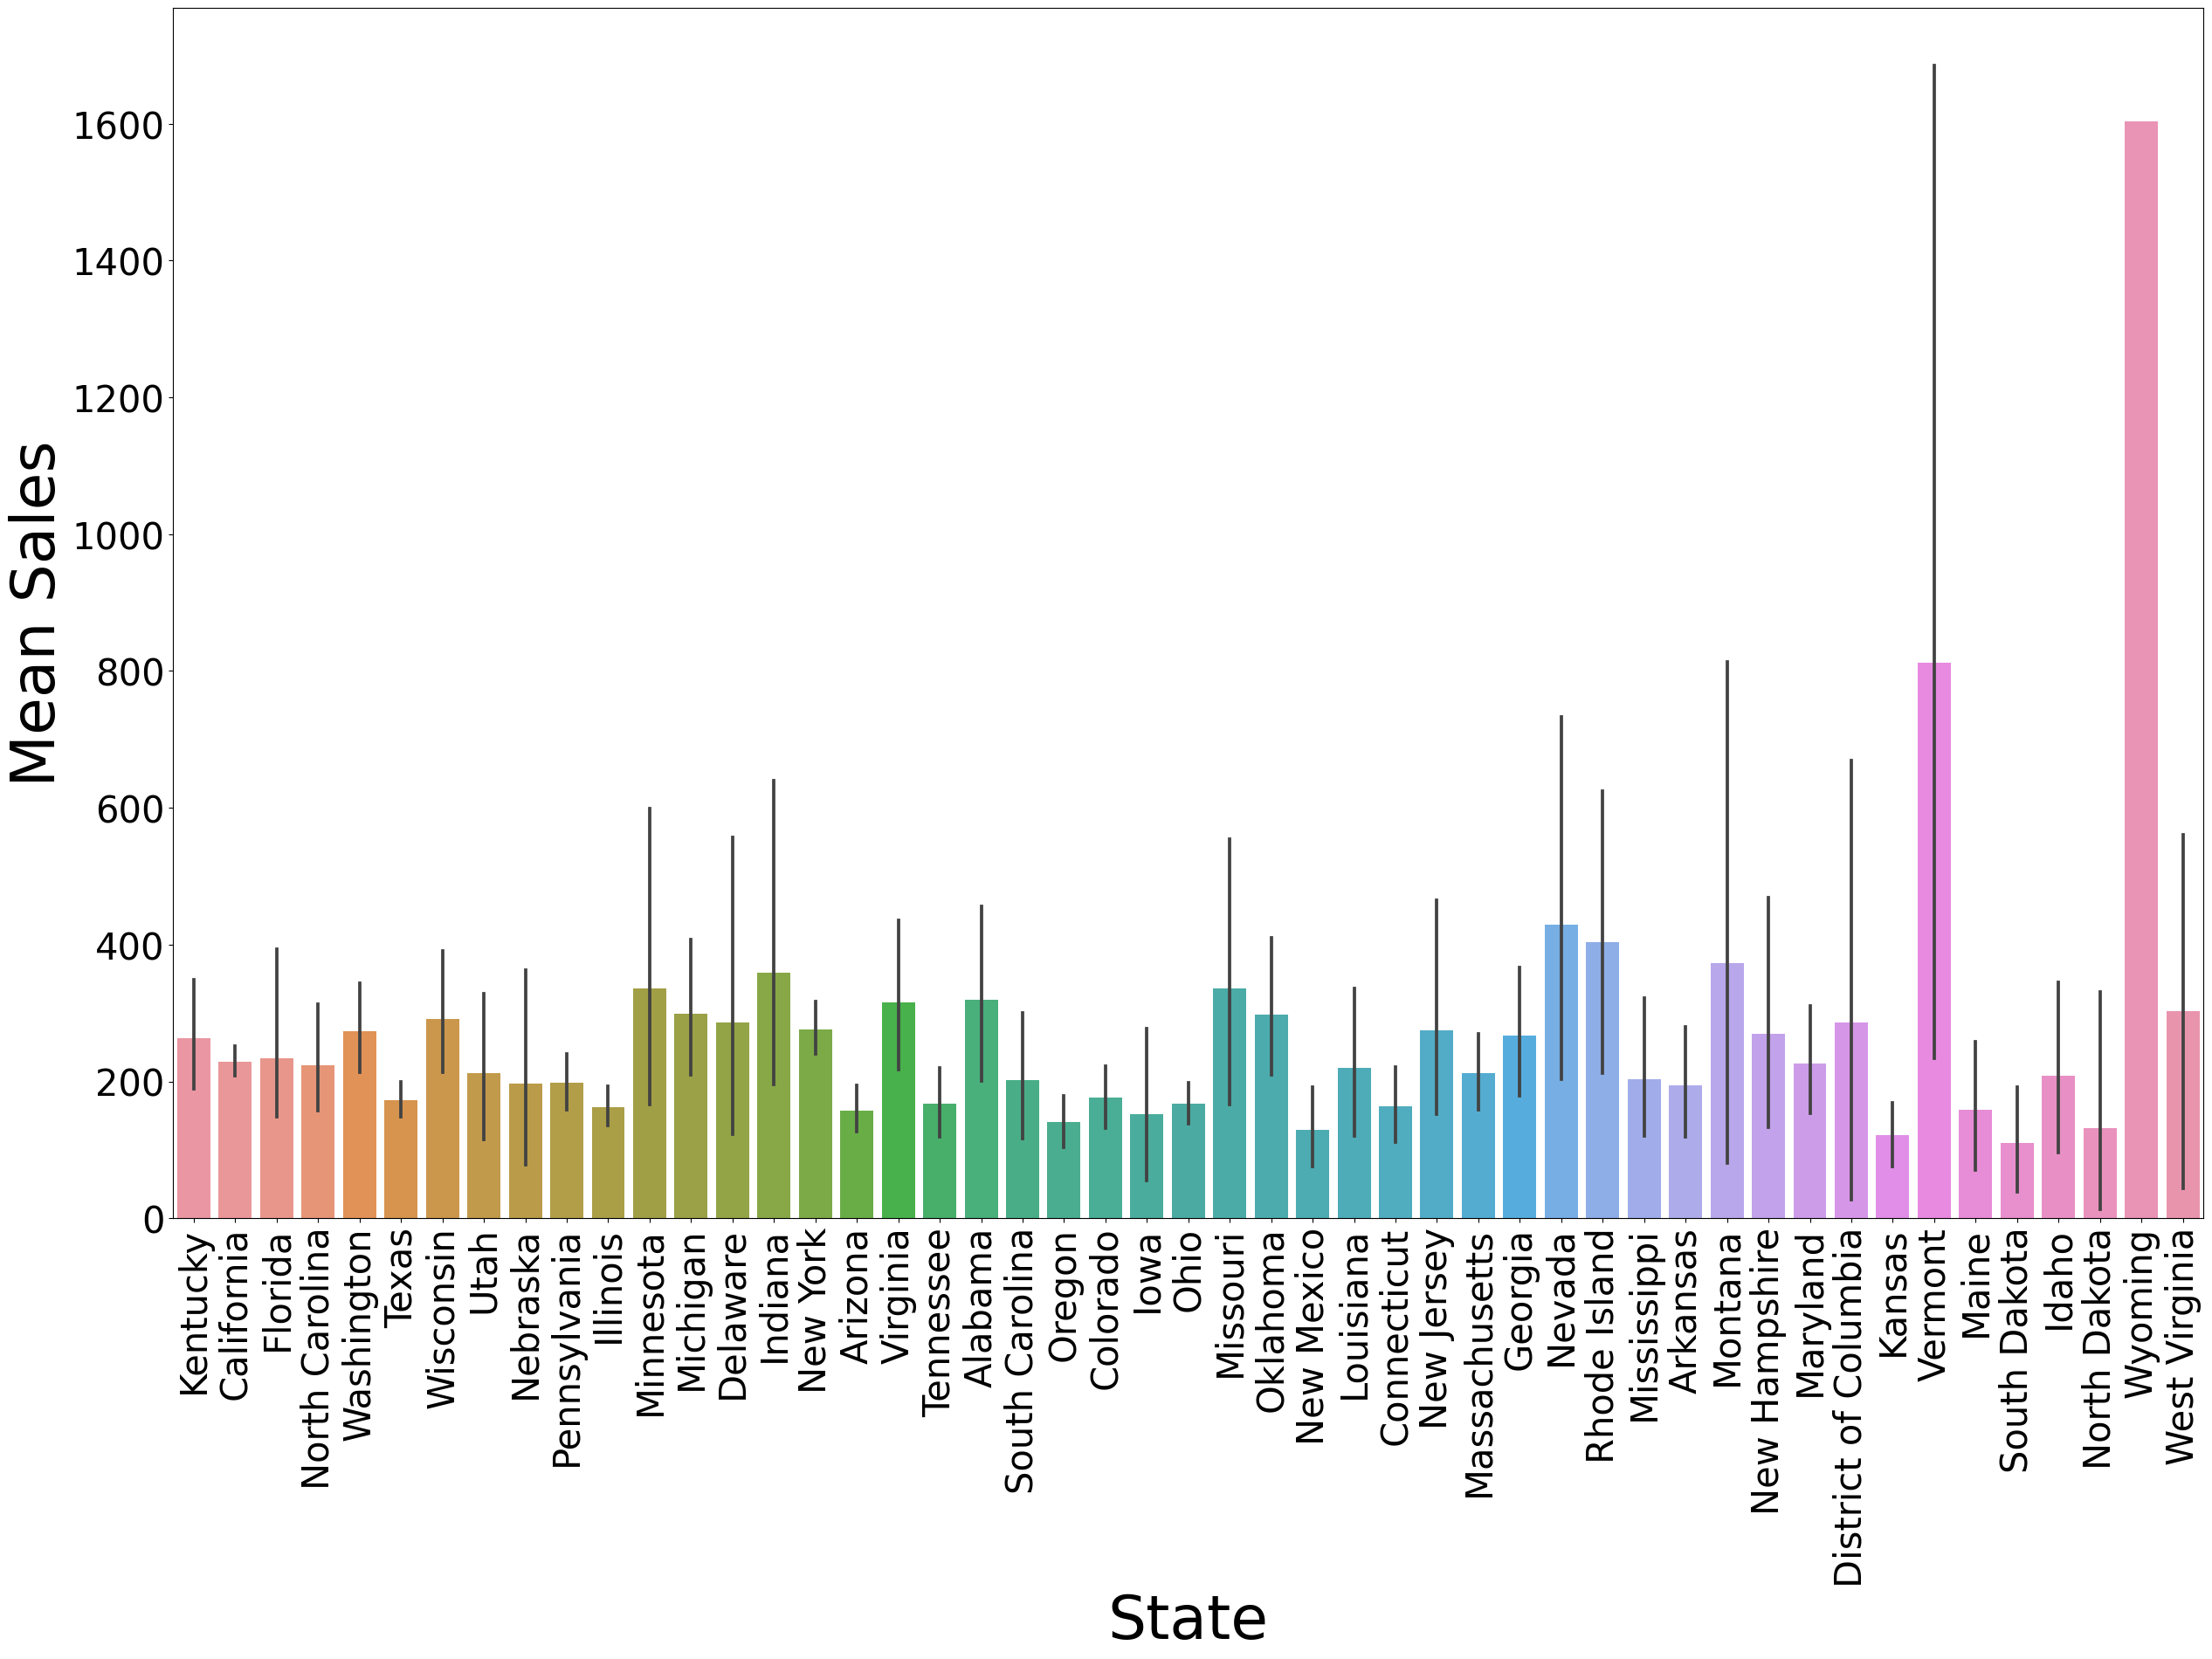

In [52]:
plt.figure(figsize=(30,18))
state = df_superstore.groupby(['State'])['Sales'].mean().reset_index()
Data=sns.barplot(x = 'State', y='Sales', data=df_superstore)
Data.set_xticklabels(Data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('State', fontsize=50) 
plt.ylabel('Mean Sales', fontsize=50)
plt.show()

Profit Vs State

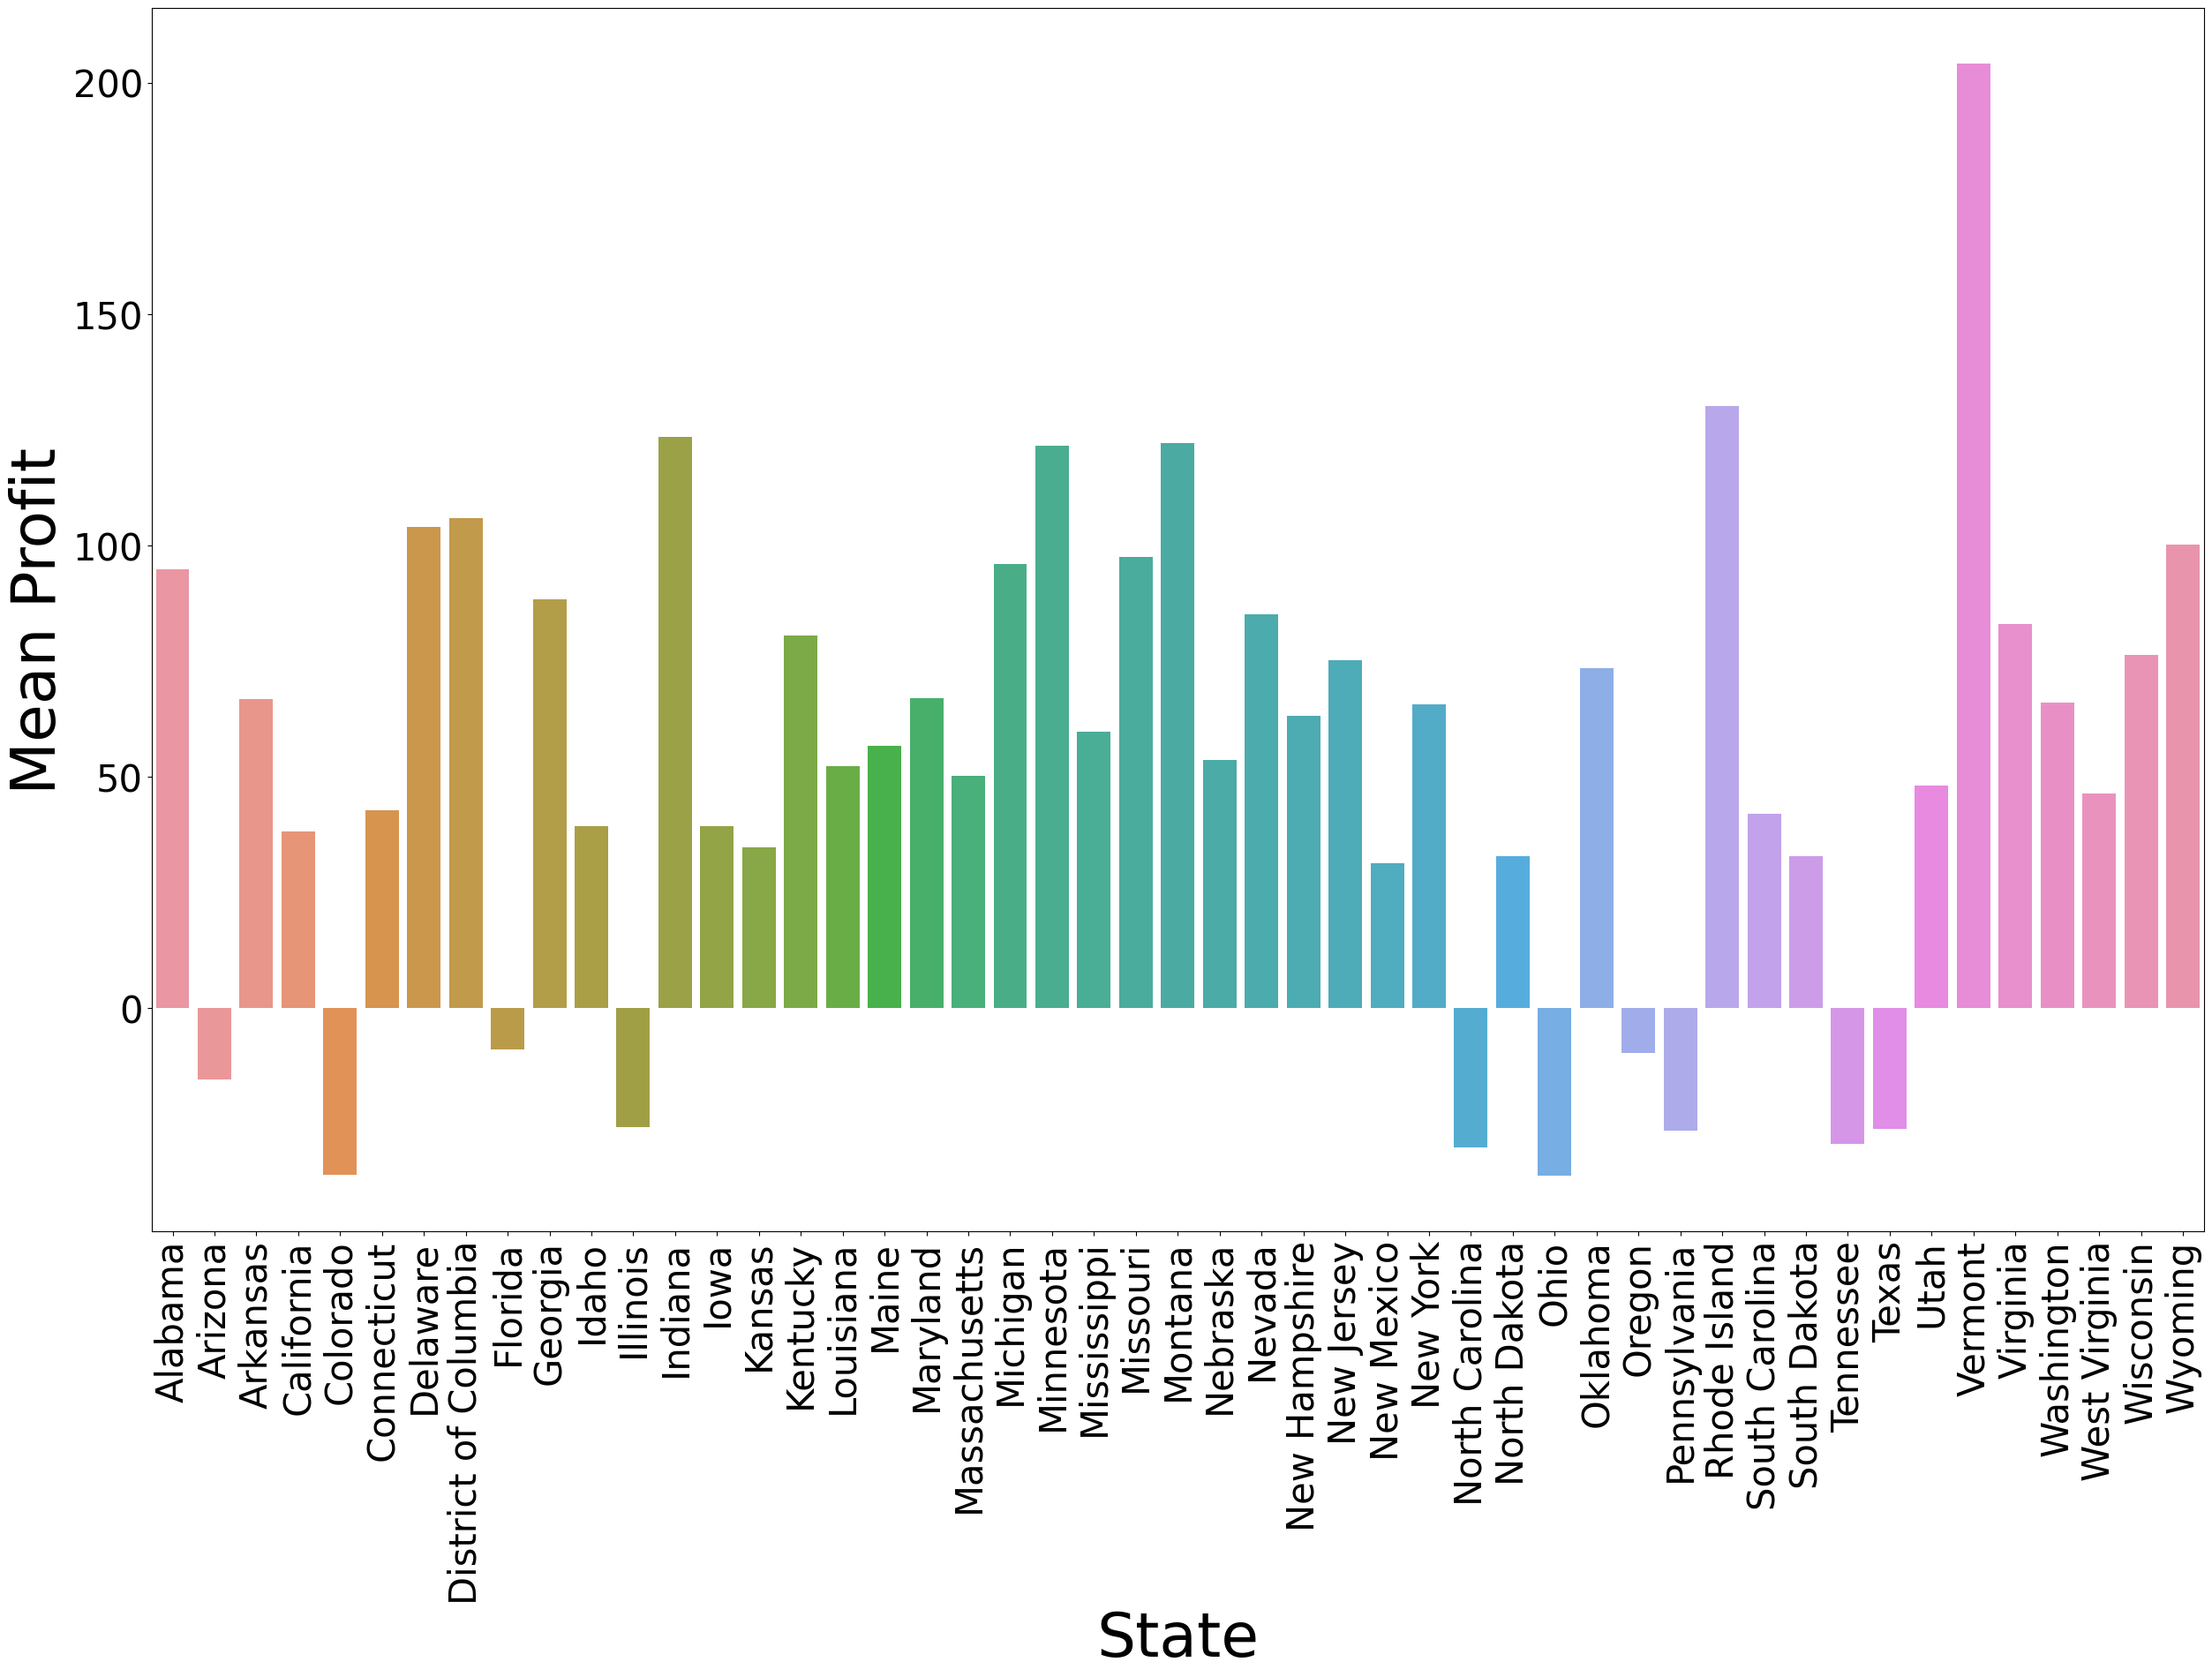

In [37]:
plt.figure(figsize=(30,18))
state1 = df_superstore.groupby(['State'])['Profit'].mean().reset_index()
data=sns.barplot(x = 'State', y='Profit', data=state1)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('State', fontsize=50) 
plt.ylabel('Mean Profit', fontsize=50)
plt.show()

Count plot for Category

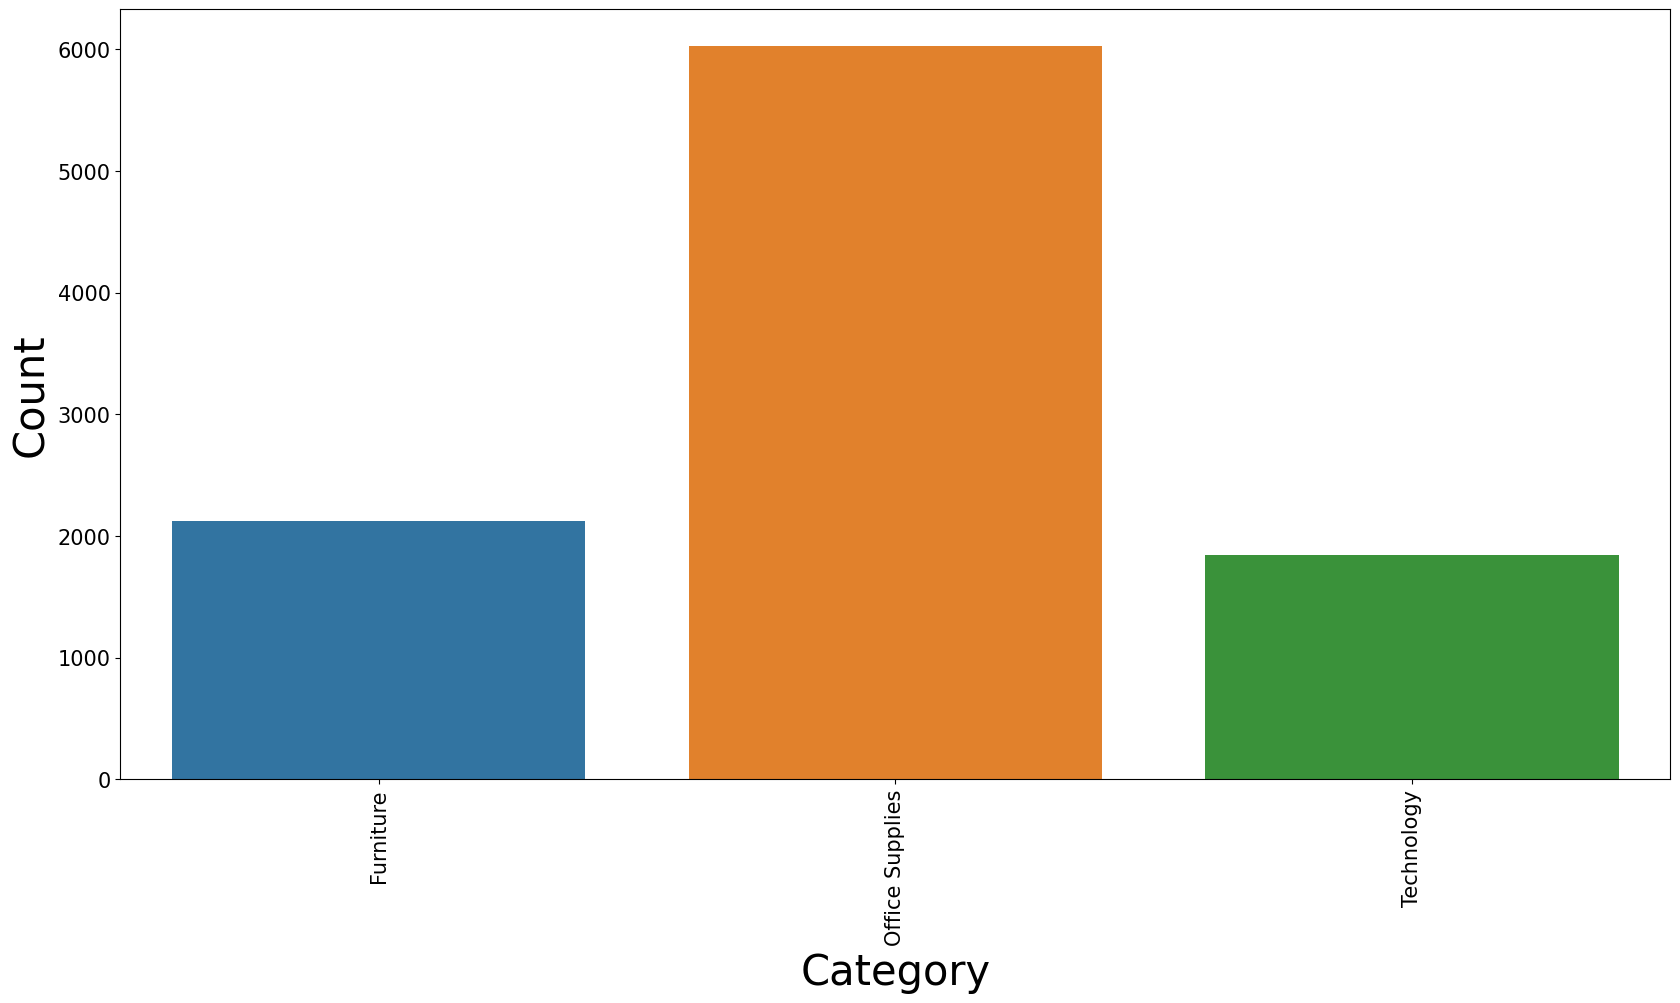

In [38]:
plt.figure(figsize=(20,10))
data=sns.countplot(x="Category", data=df_superstore)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Category', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.show()  

Category wise Sales

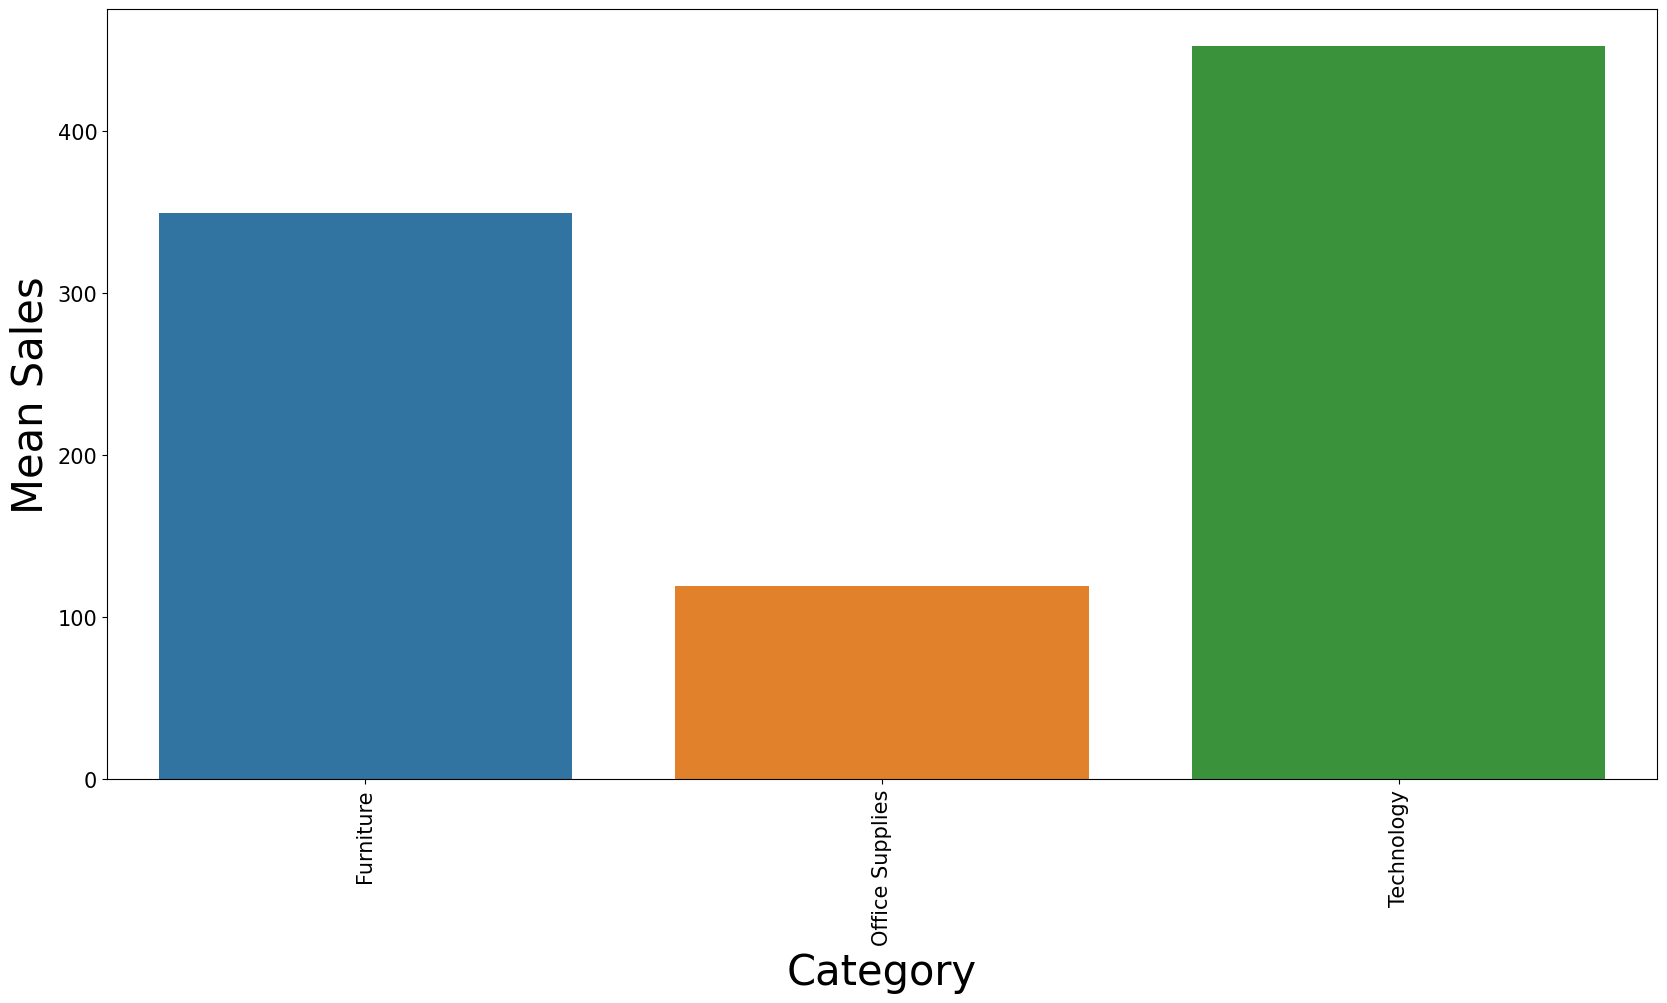

In [41]:
plt.figure(figsize=(20,10))
category = df_superstore.groupby(['Category'])['Sales'].mean().reset_index()
data=sns.barplot(x = 'Category', y='Sales', data=category)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Category', fontsize=30) 
plt.ylabel('Mean Sales', fontsize=30)
plt.show()

Category Vs Profit

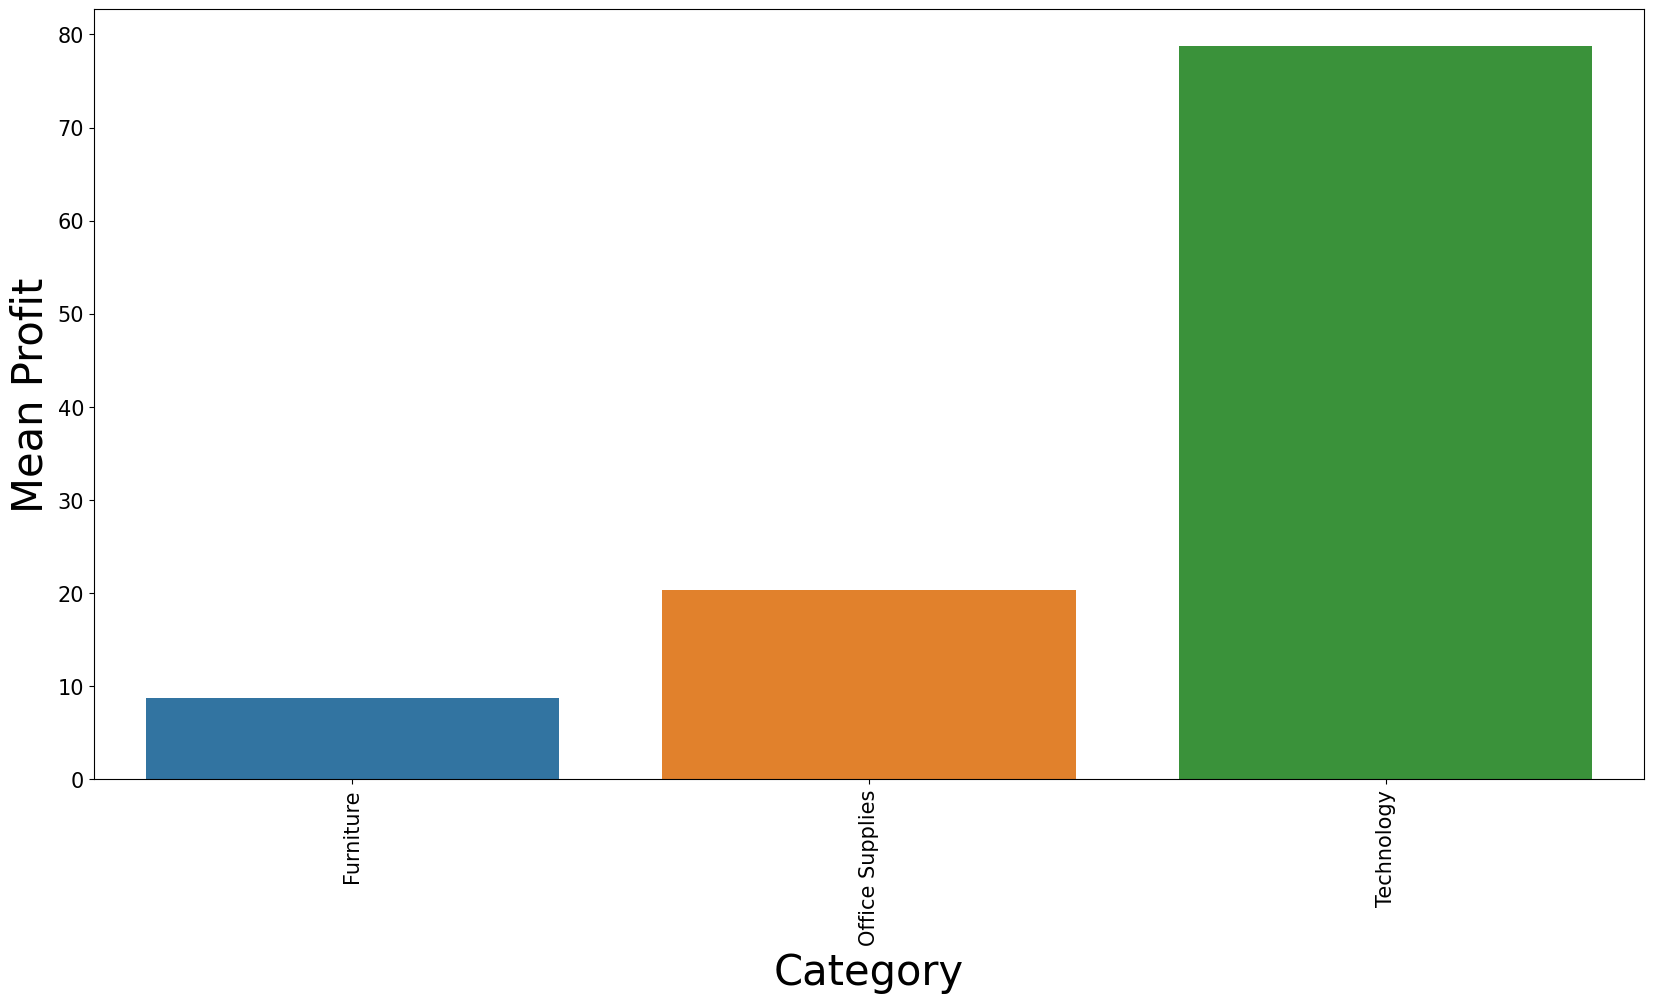

In [43]:
plt.figure(figsize=(20,10))
category2 = df_superstore.groupby(['Category'])['Profit'].mean().reset_index()
data=sns.barplot(x = 'Category', y='Profit', data=category2)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Category', fontsize=30) 
plt.ylabel('Mean Profit', fontsize=30)
plt.show()

Discount Vs Category

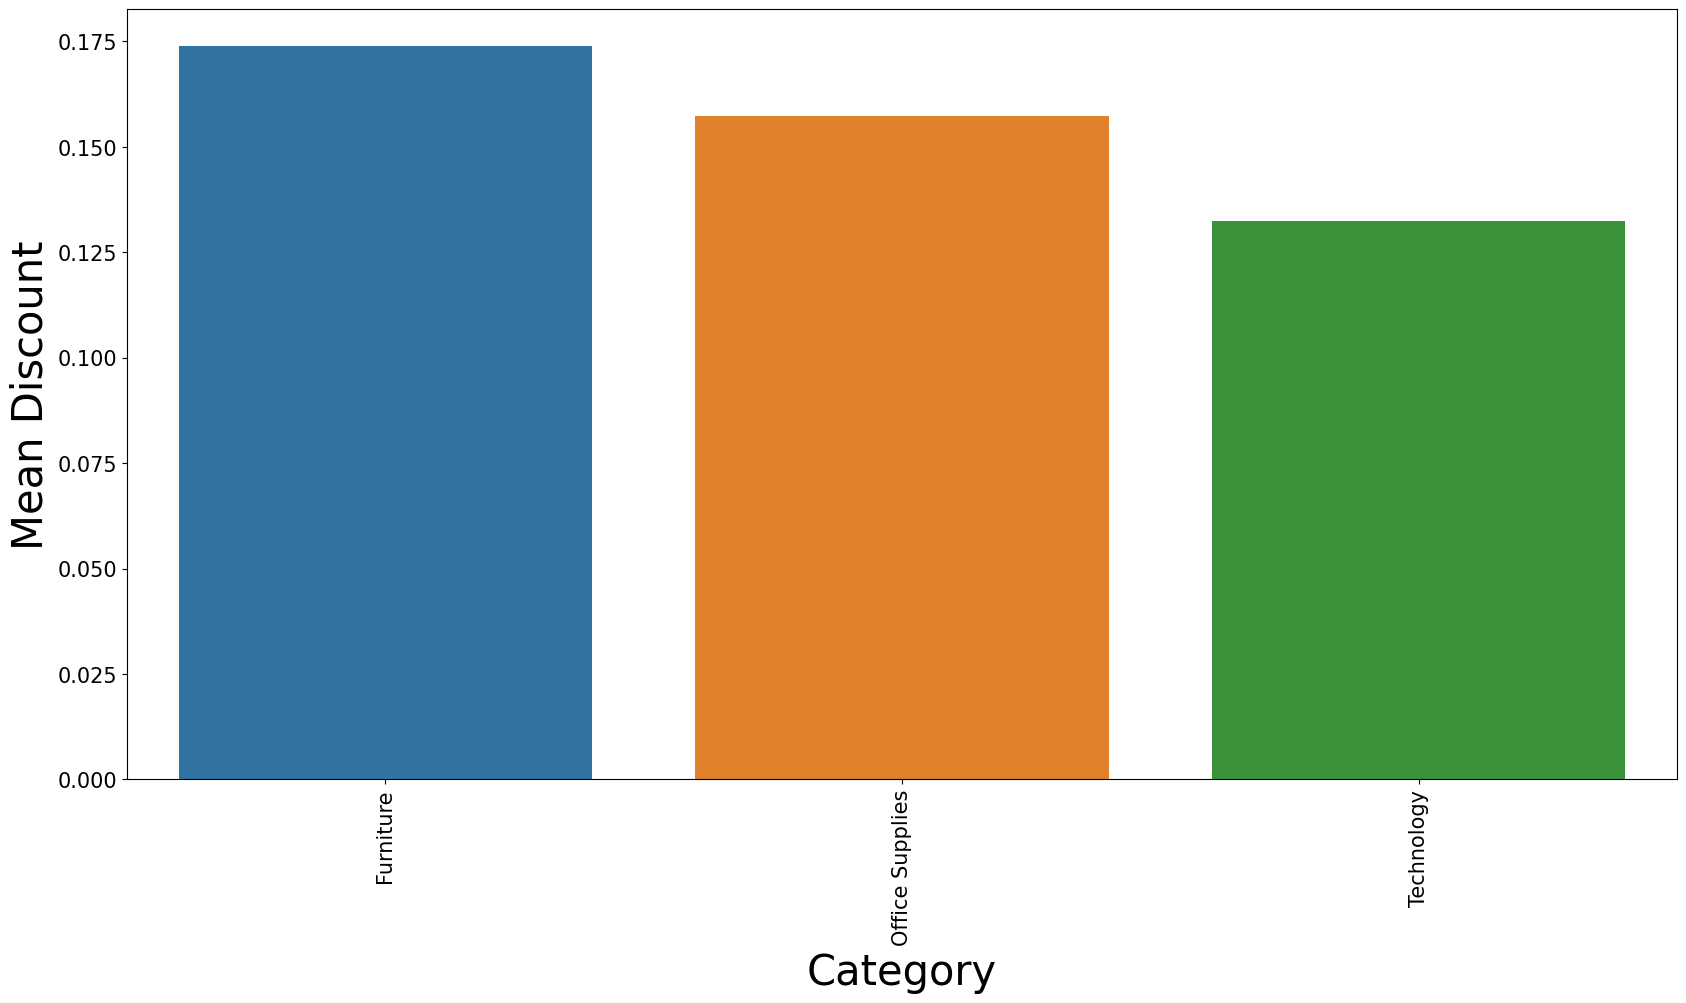

In [53]:
plt.figure(figsize=(20,10))
category1 = df_superstore.groupby(['Category'])['Discount'].mean().reset_index()
data=sns.barplot(x = 'Category', y='Discount', data=category1)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Category', fontsize=30) 
plt.ylabel('Mean Discount', fontsize=30)
plt.show()

Count plot for Sub-Category

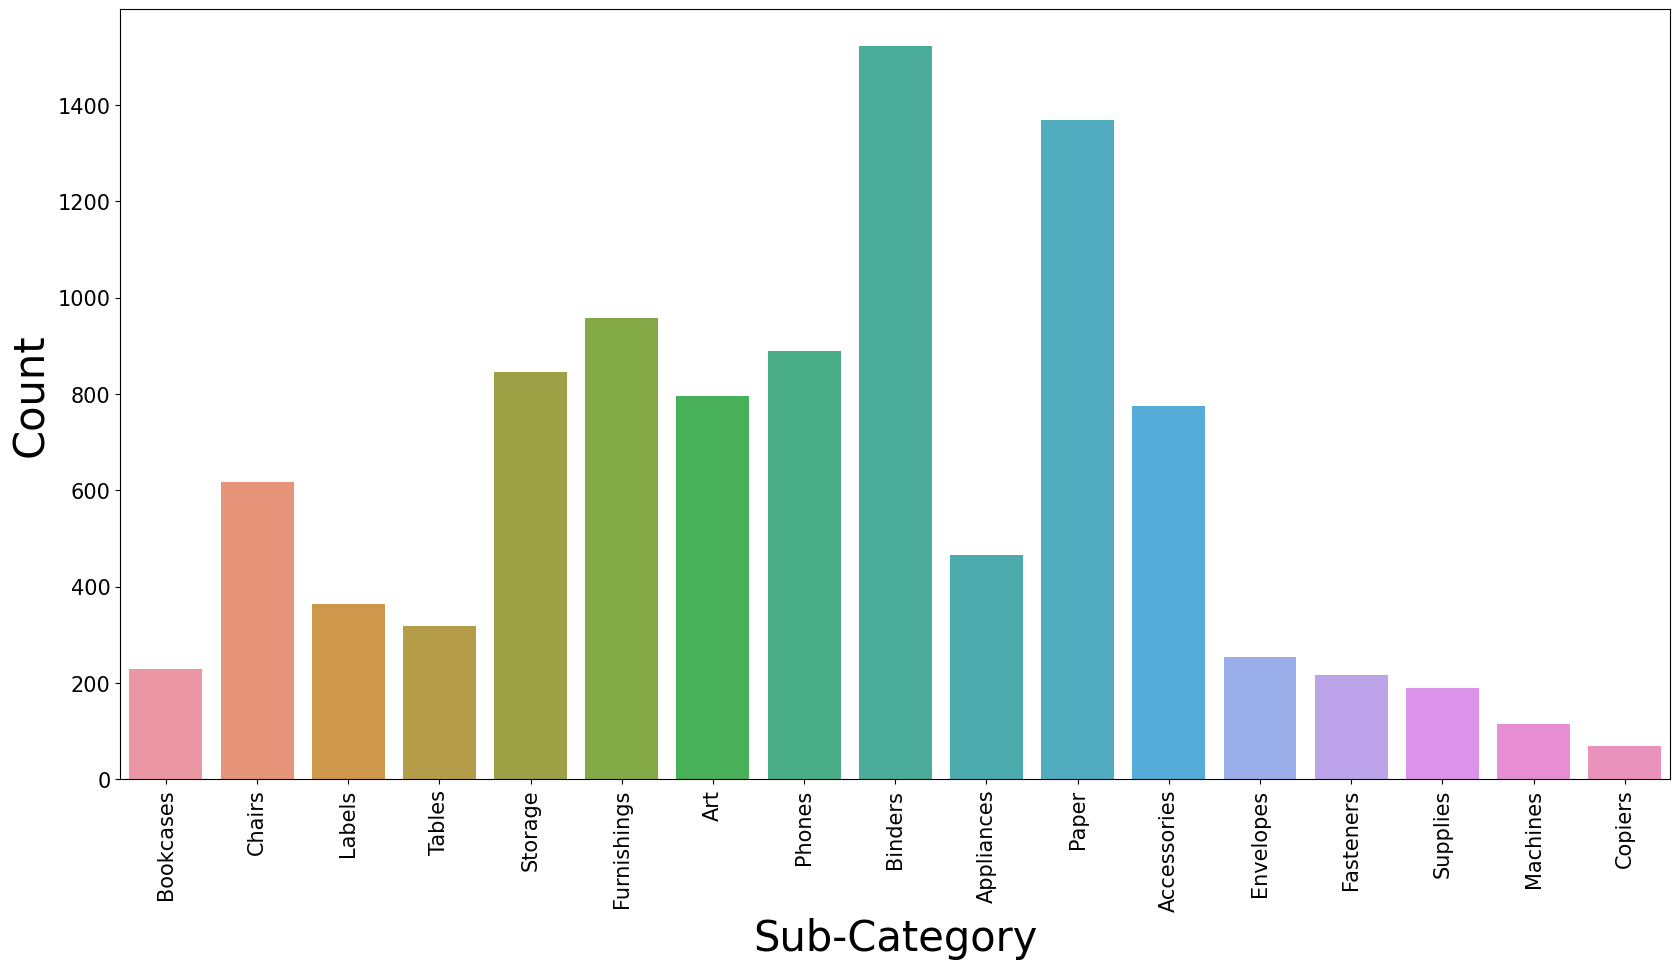

In [54]:
plt.figure(figsize=(20,10))
data=sns.countplot(x="Sub-Category", data=df_superstore)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.show()  

Sales for Sub-Category

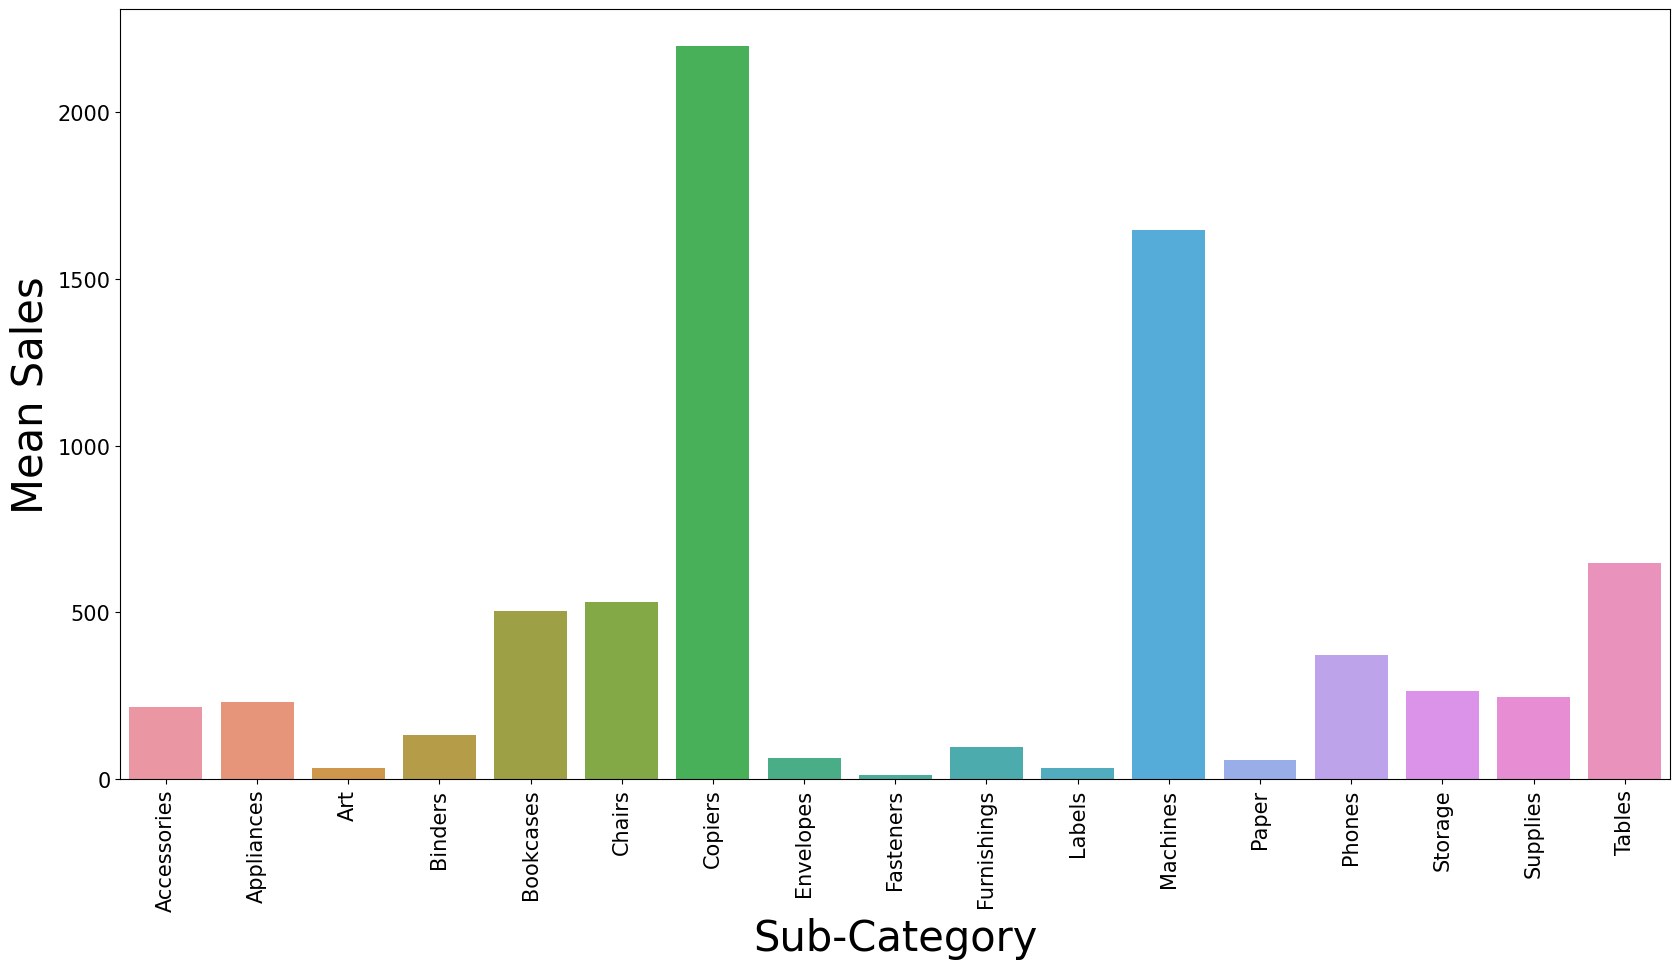

In [55]:
plt.figure(figsize=(20,10))
subcate = df_superstore.groupby(['Sub-Category'])['Sales'].mean().reset_index()
data=sns.barplot(x = 'Sub-Category', y='Sales', data=subcate)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Mean Sales', fontsize=30)
plt.show()

Discount for Sub-Category

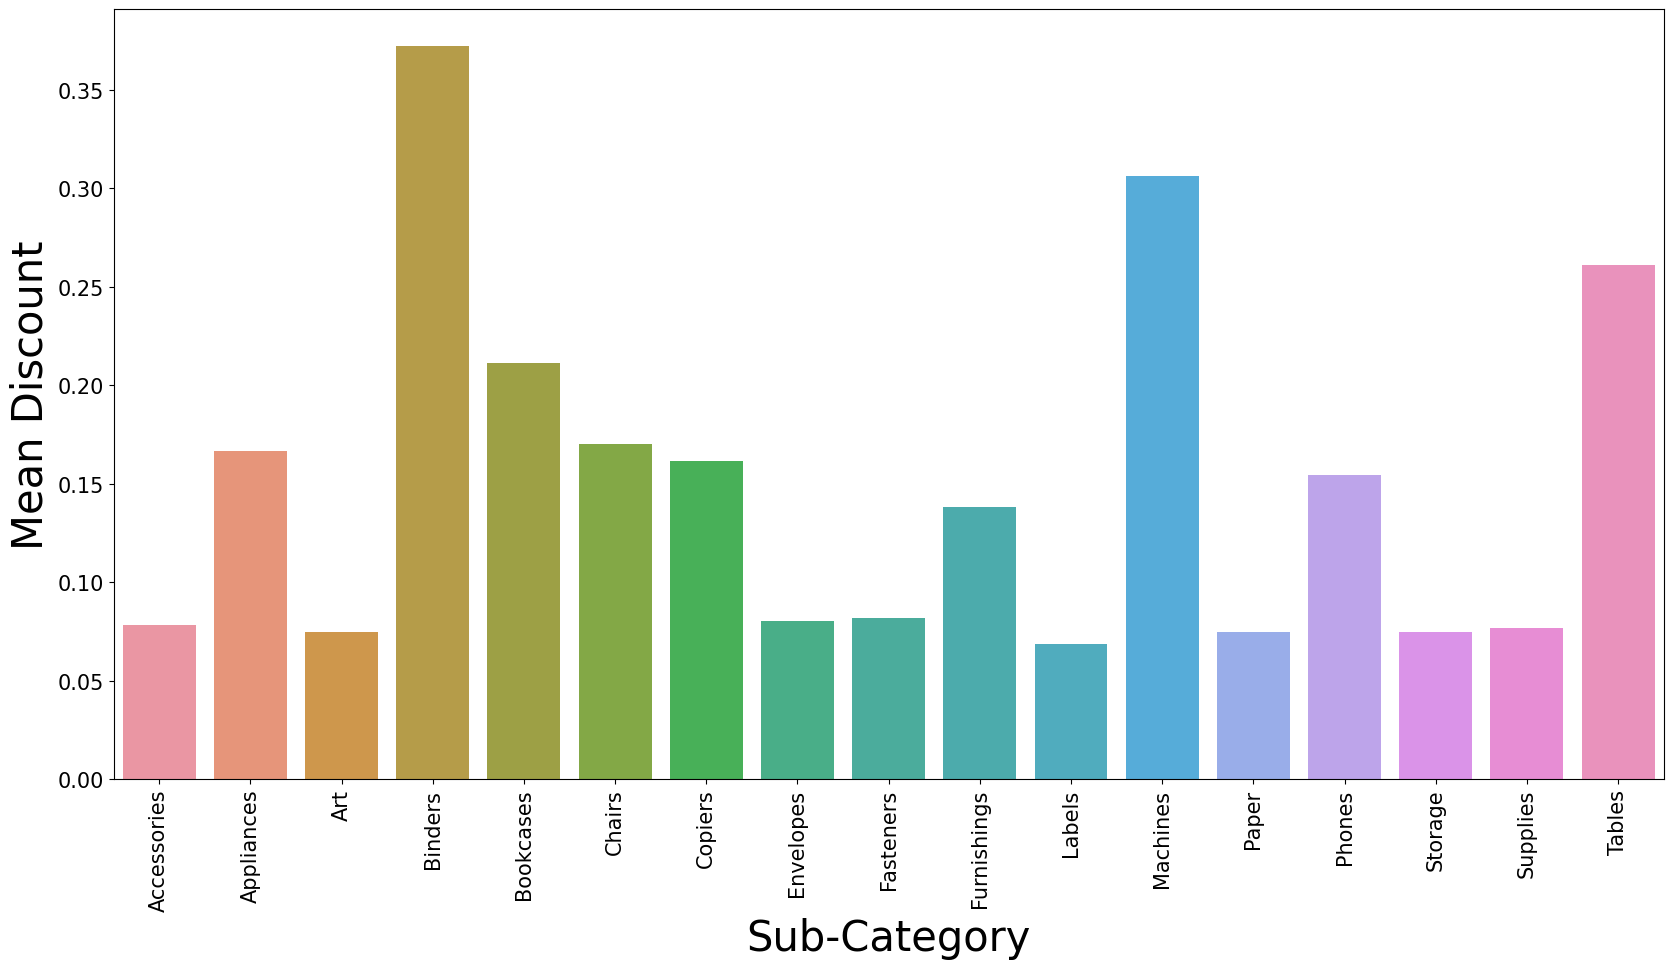

In [57]:
plt.figure(figsize=(20,10))
subcate = df_superstore.groupby(['Sub-Category'])['Discount'].mean().reset_index()
data=sns.barplot(x = 'Sub-Category', y='Discount', data=subcate)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Mean Discount', fontsize=30)
plt.show()

Profit Vs Sub-Category

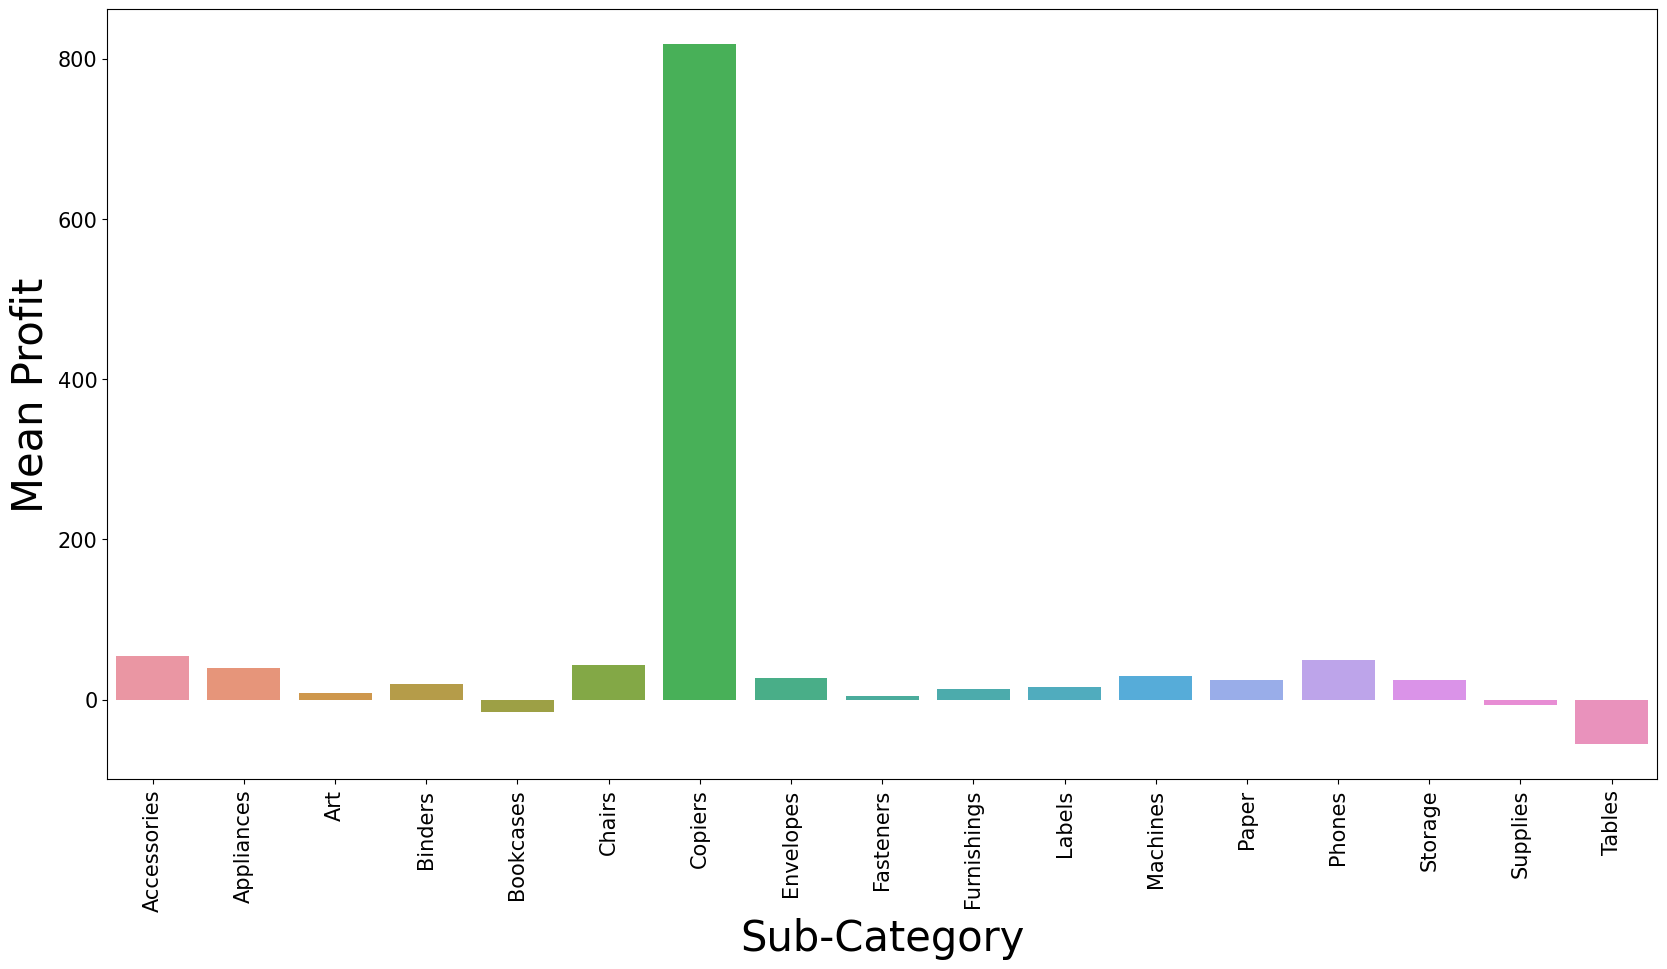

In [58]:
plt.figure(figsize=(20,10))
subcate = df_superstore.groupby(['Sub-Category'])['Profit'].mean().reset_index()
data=sns.barplot(x = 'Sub-Category', y='Profit', data=subcate)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Mean Profit', fontsize=30)
plt.show()

Count plot for Region

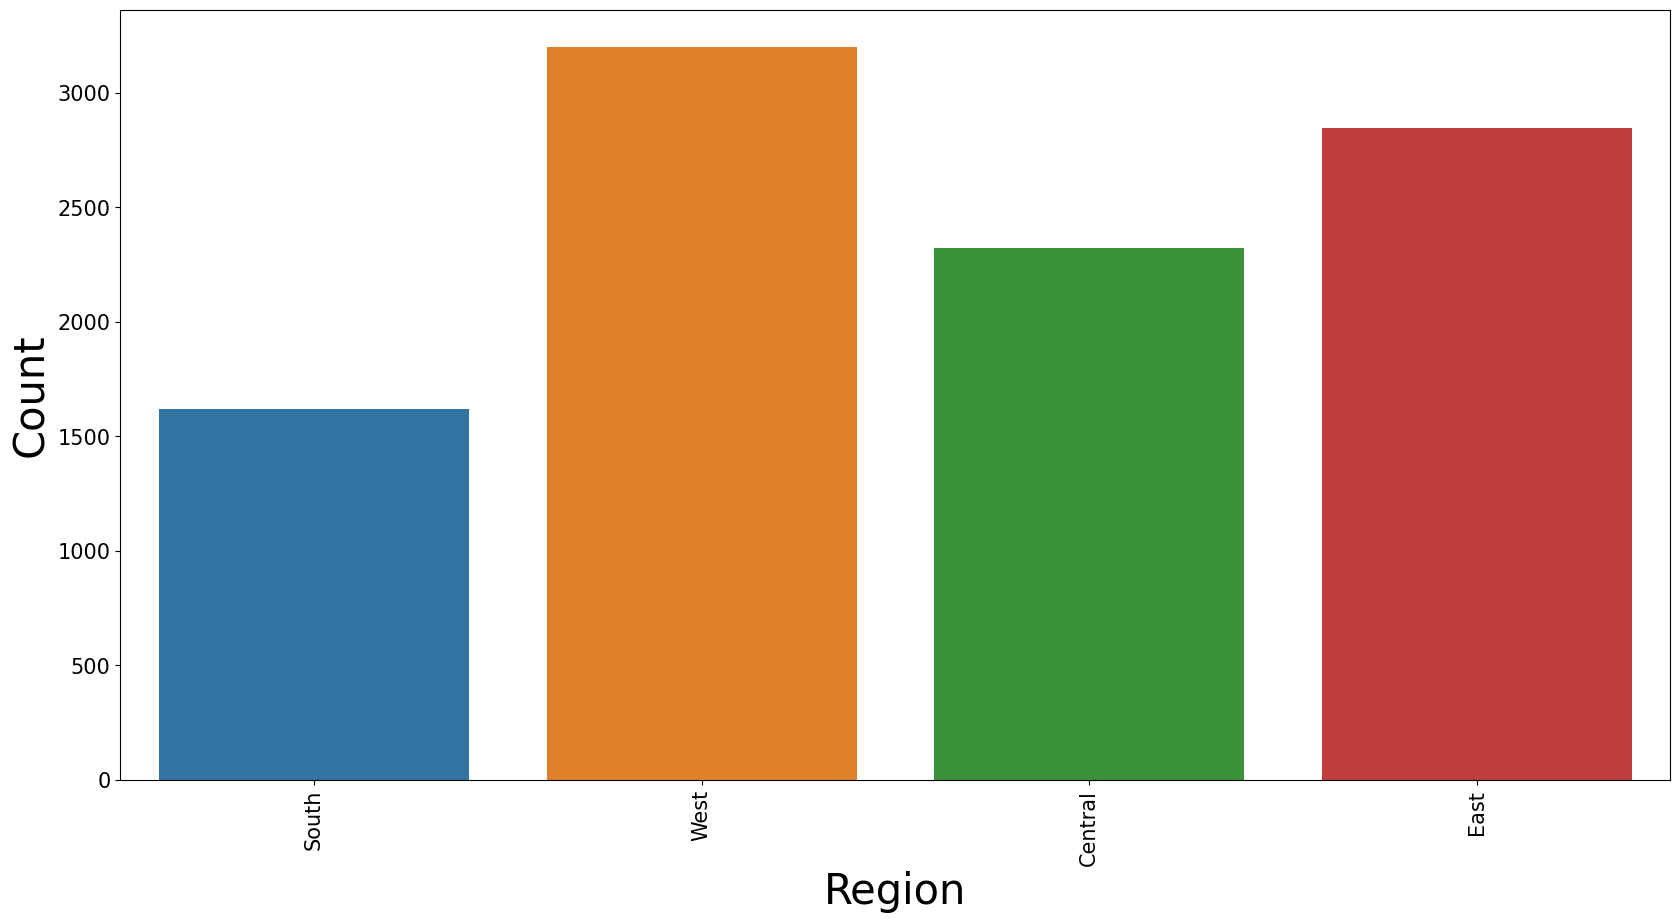

In [59]:
plt.figure(figsize=(20,10))
data=sns.countplot(x="Region", data=df_superstore)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Region', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.show()

Sales Vs Region 

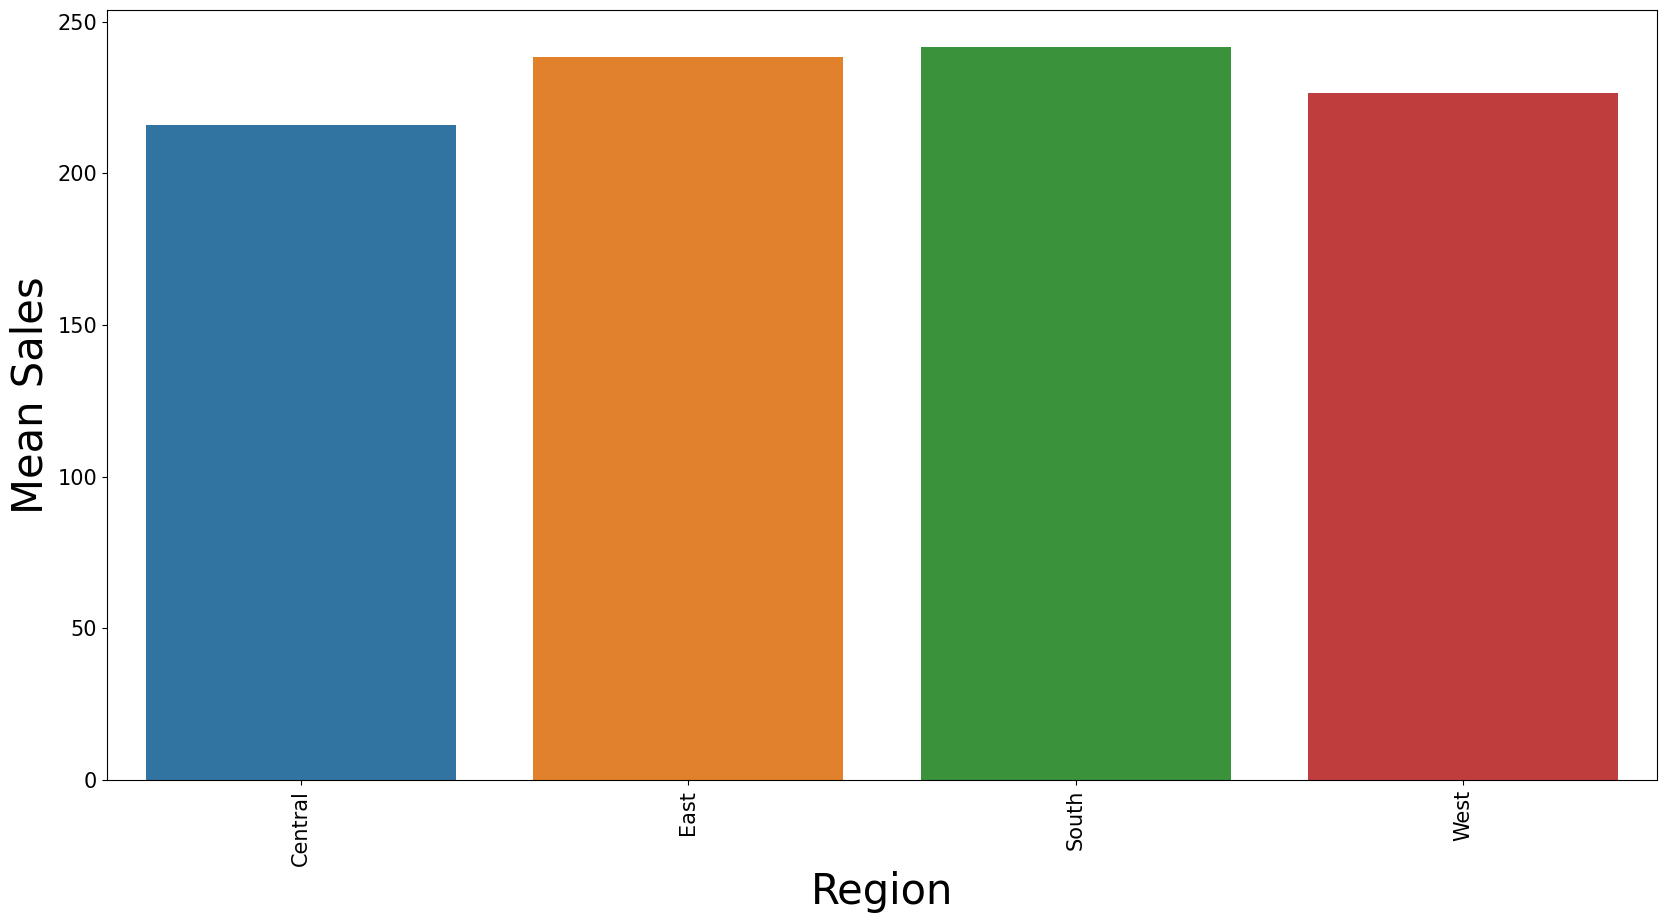

In [60]:
plt.figure(figsize=(20,10))
region = df_superstore.groupby(['Region'])['Sales'].mean().reset_index()
data=sns.barplot(x = 'Region', y='Sales', data=region)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Region', fontsize=30) 
plt.ylabel('Mean Sales', fontsize=30)
plt.show()

Discount Vs Region

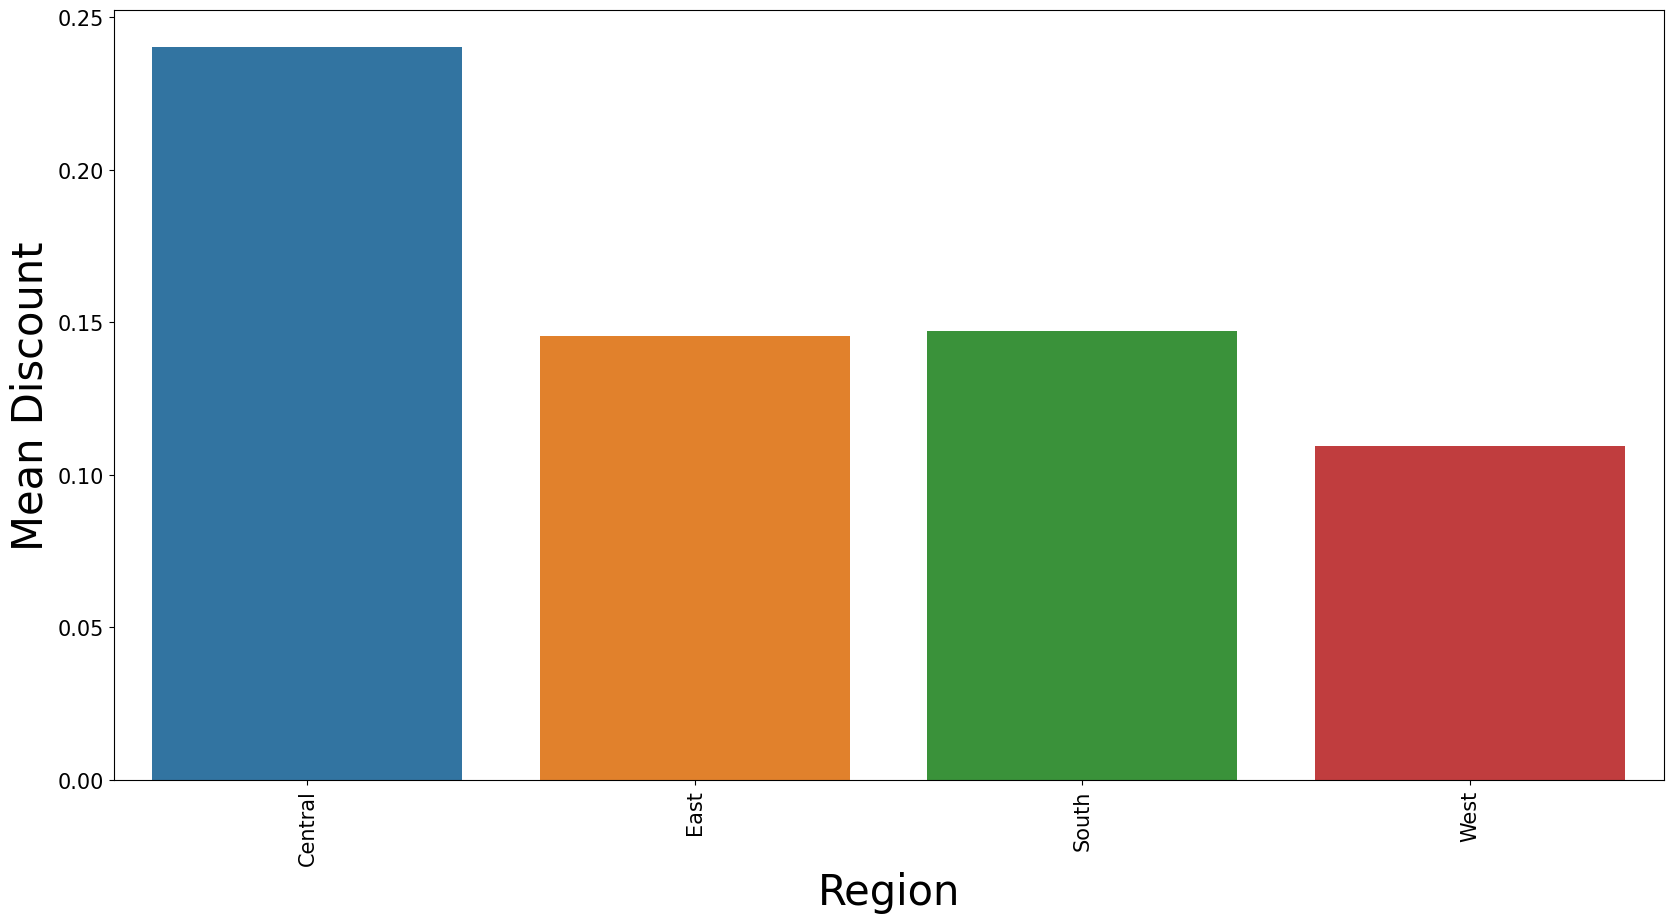

In [61]:
plt.figure(figsize=(20,10))
region = df_superstore.groupby(['Region'])['Discount'].mean().reset_index()
data=sns.barplot(x = 'Region', y='Discount', data=region)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Region', fontsize=30) 
plt.ylabel('Mean Discount', fontsize=30)
plt.show()

Profit Vs Region

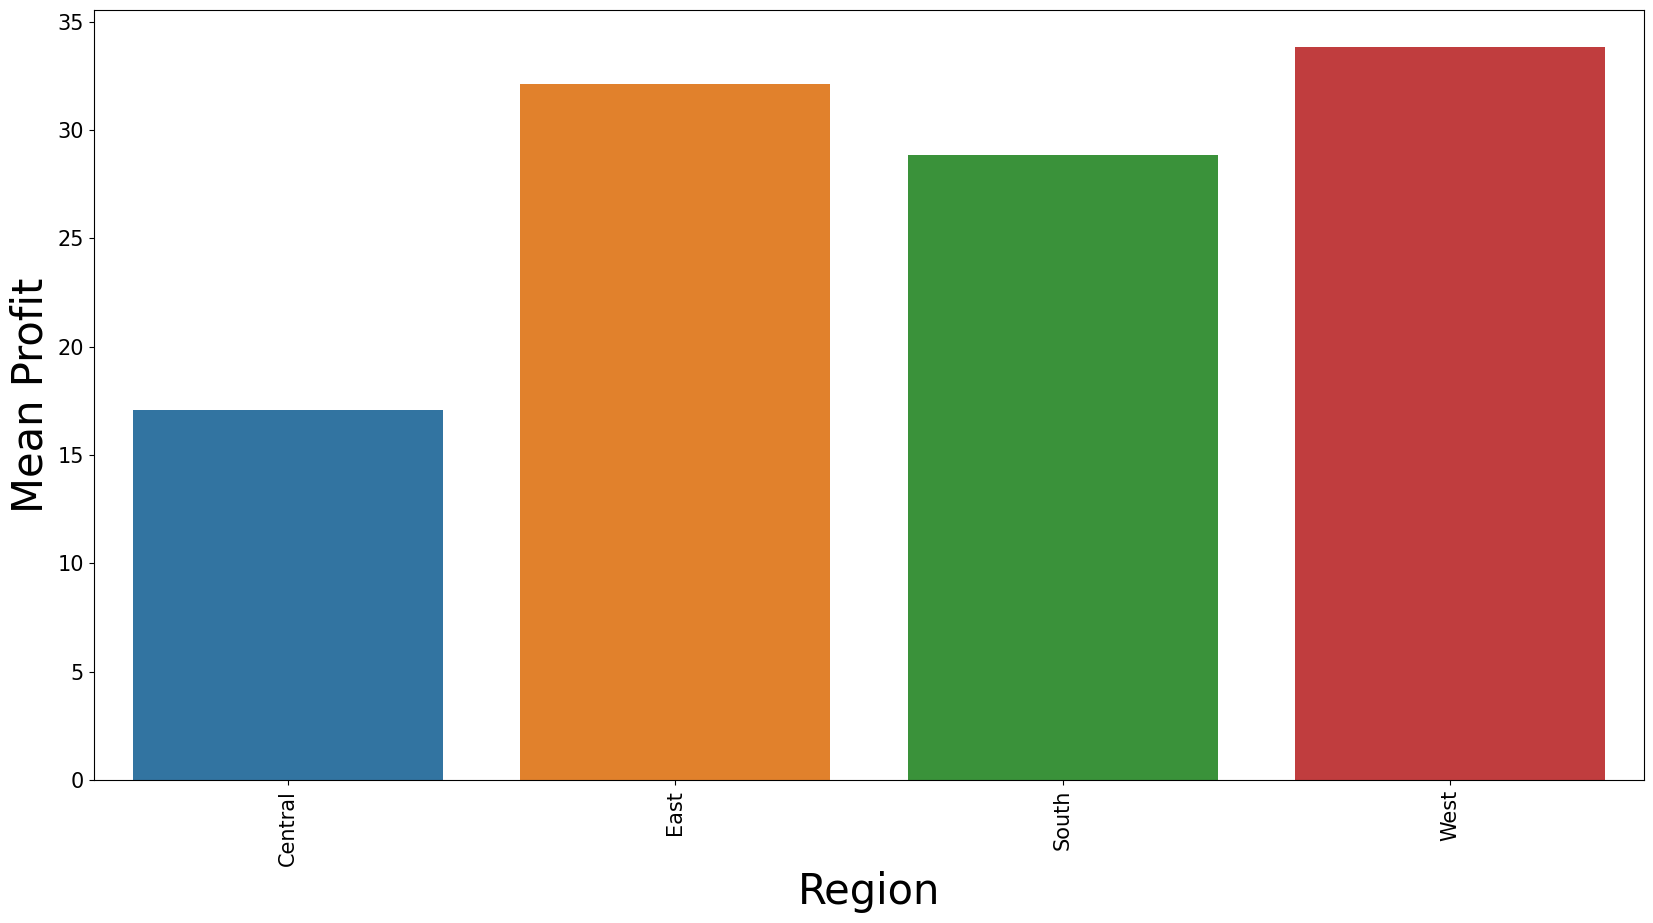

In [63]:
plt.figure(figsize=(20,10))
region = df_superstore.groupby(['Region'])['Profit'].mean().reset_index()
data=sns.barplot(x = 'Region', y='Profit', data=region)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Region', fontsize=30) 
plt.ylabel('Mean Profit', fontsize=30)
plt.show()

Count plot for ship mode

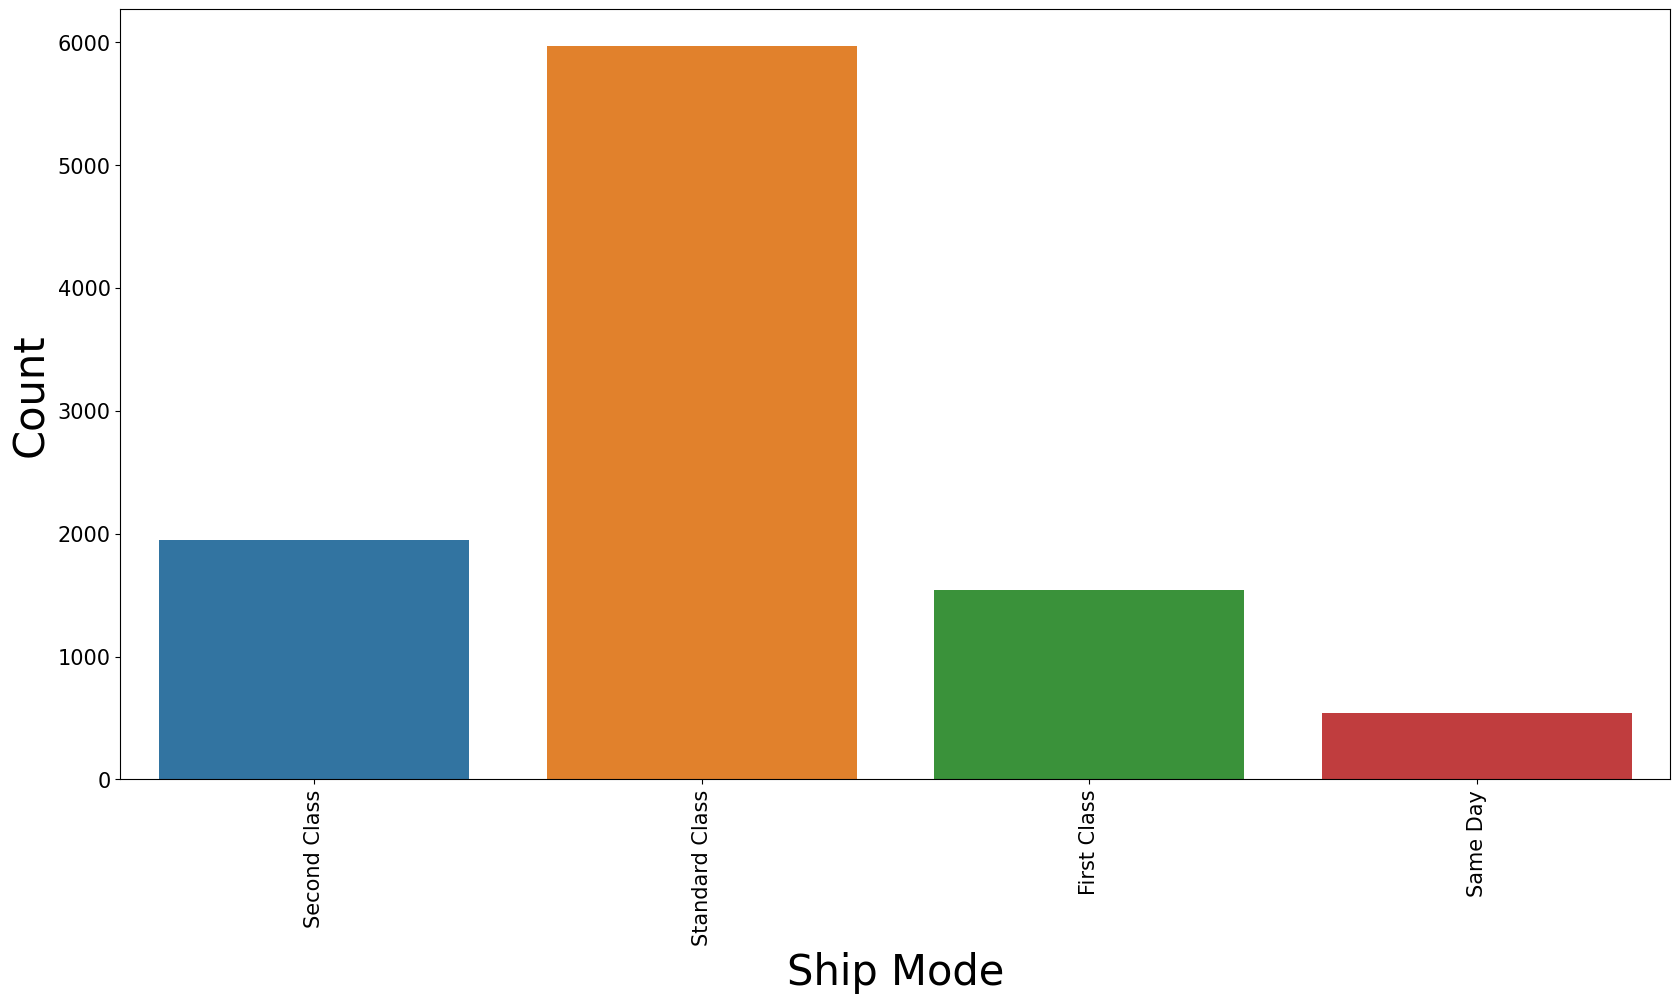

In [45]:
plt.figure(figsize=(20,10))
data=sns.countplot(x="Ship Mode", data=df_superstore)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ship Mode', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.show()

Shipmode Vs Discount

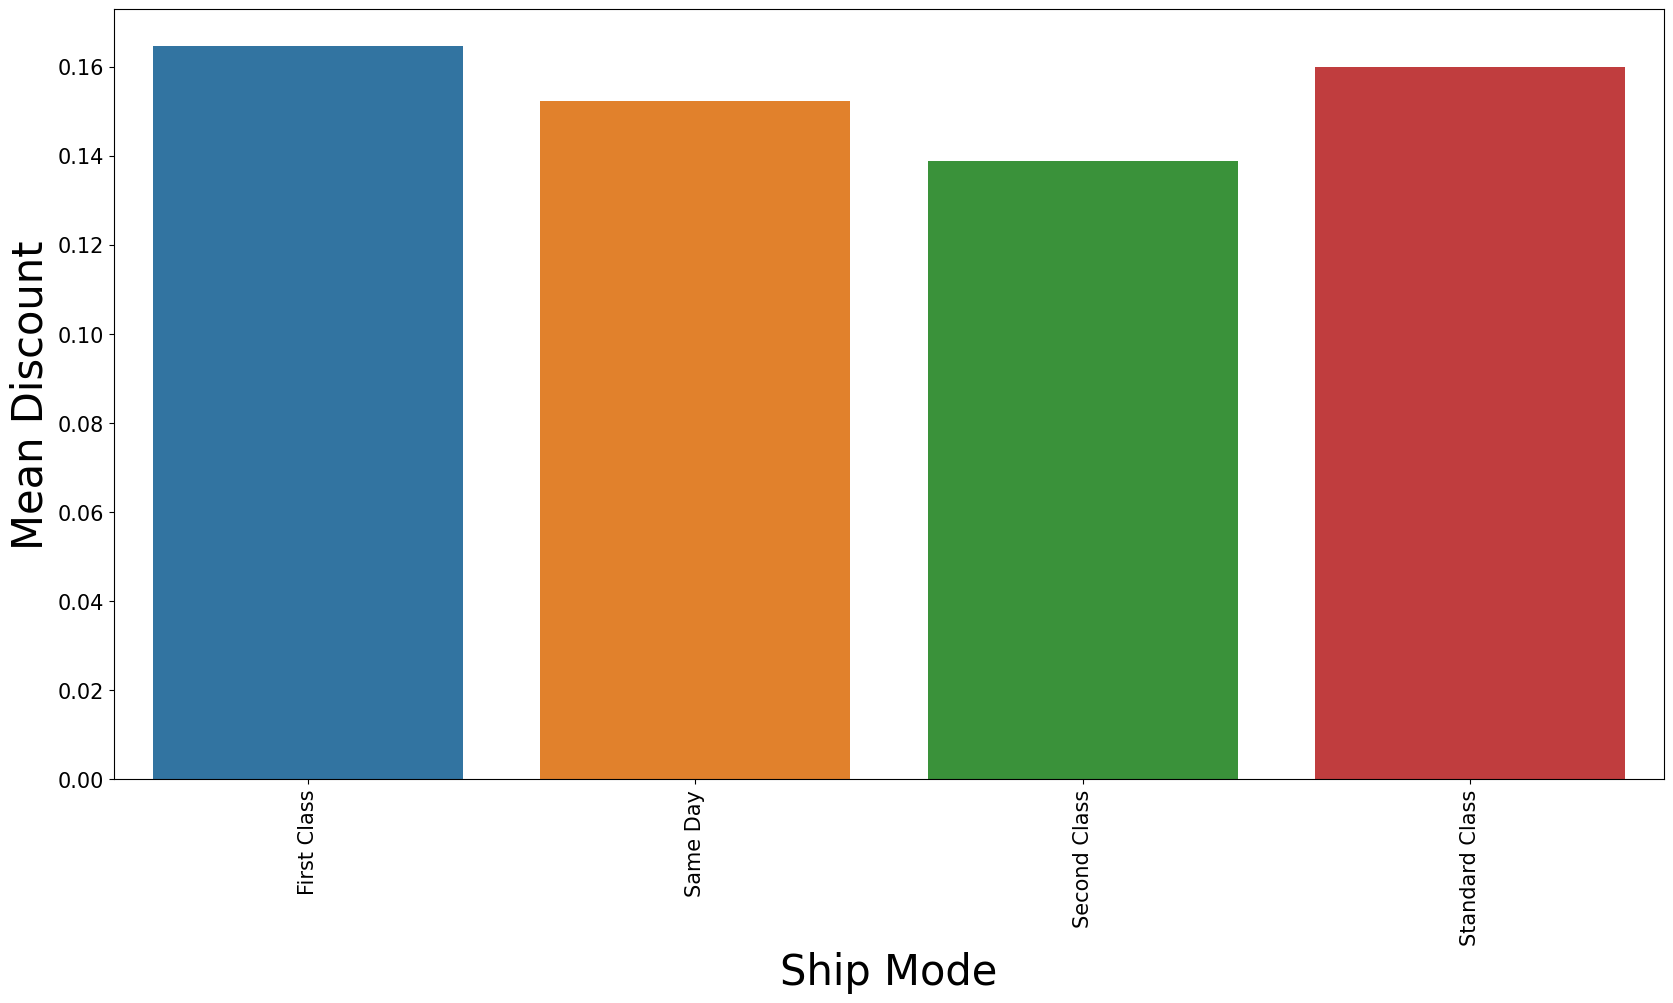

In [50]:
plt.figure(figsize=(20,10))
shipmode = df_superstore.groupby(['Ship Mode'])['Discount'].mean().reset_index()
data=sns.barplot(x = 'Ship Mode', y='Discount', data=shipmode)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ship Mode', fontsize=30) 
plt.ylabel('Mean Discount', fontsize=30)
plt.show()

Shipmode Vs Profit

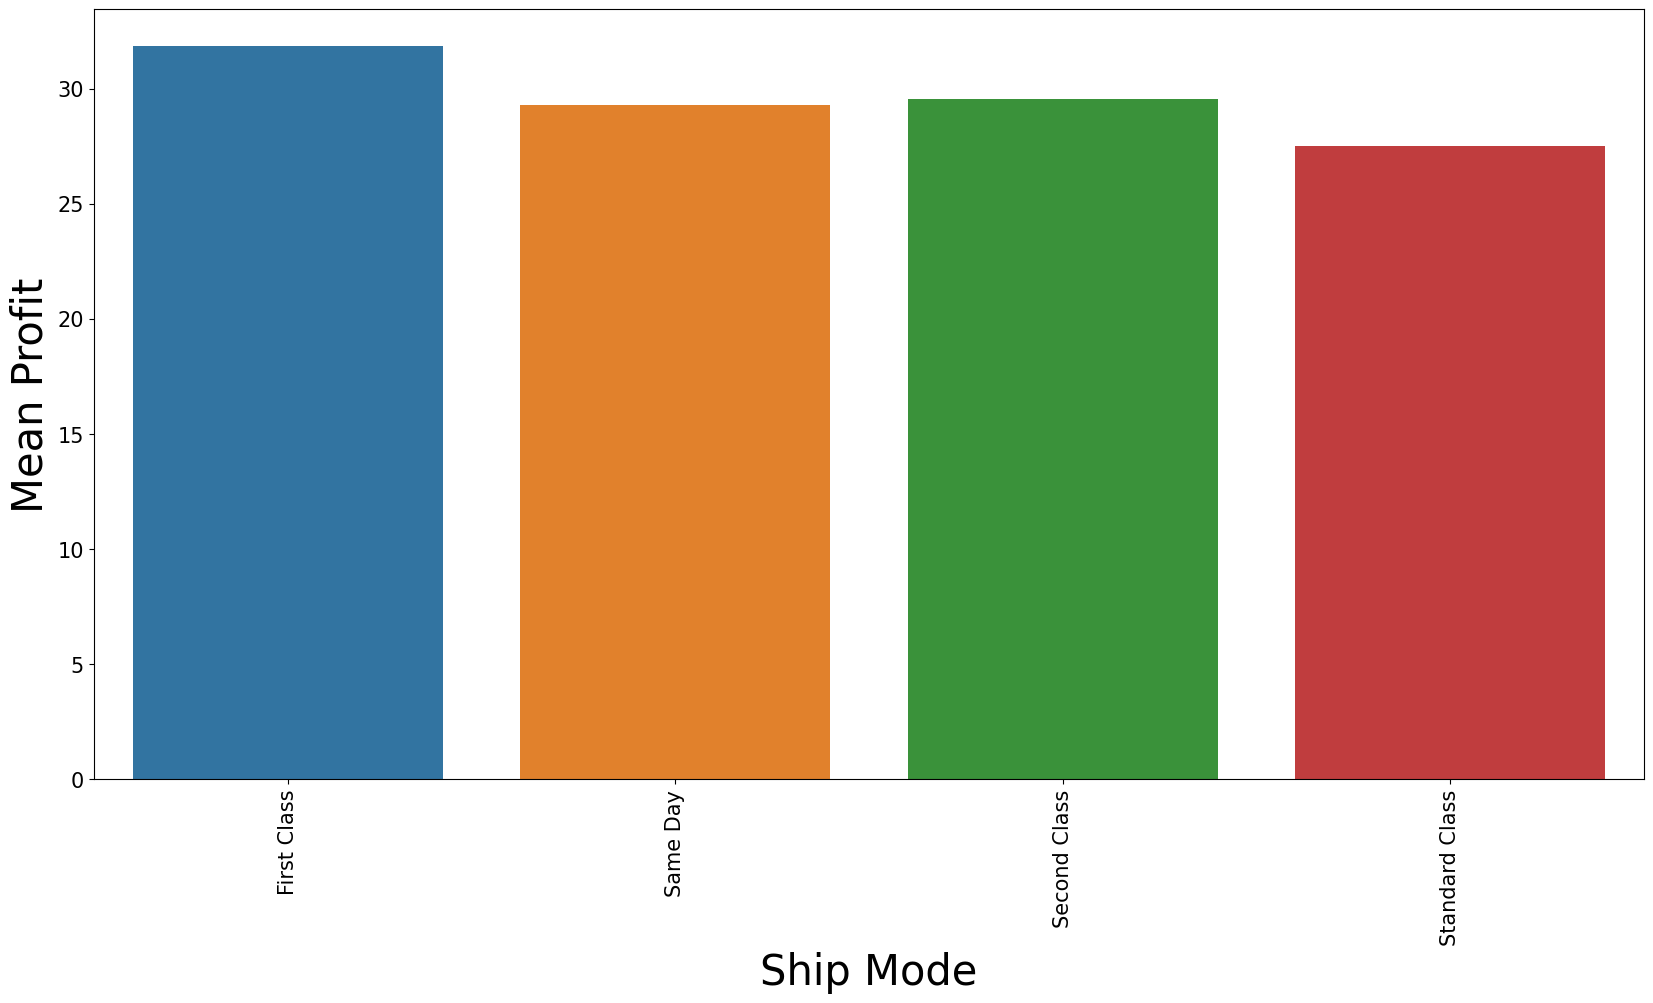

In [47]:
plt.figure(figsize=(20,10))
shipmode = df_superstore.groupby(['Ship Mode'])['Profit'].mean().reset_index()
data=sns.barplot(x = 'Ship Mode', y='Profit', data=shipmode)
data.set_xticklabels(data.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ship Mode', fontsize=30) 
plt.ylabel('Mean Profit', fontsize=30)
plt.show()

Insights

1.Standard class Ship Mode has highest orders.

2.Some Data in Ship mode has lowest number of orders it would be better if we try to increase them by some discount in sevices

3.From West Region there are more number of orders and profits are also high in West Region, need to concentrate on south as there are less orders

4.Copiers sub-category has highest sales ans has maximum profit from sub-categories,we need to make a plan so that we can do to increase the sales and profits of other sub-categories also.

5.Technology Category has highes sales and maximum profit ,need to concentate on Office Supplies category to increase sales.

6.California State has highest sales but it doesn't have highest profits so we need to make sure that we make considerable profits from this state.

7.Vermont State has less number of orders but make best average Profit we need to make sure we have more number of orders.

8.Arizona,Texas,Tennessee,,North Carolina,illinois,Florida,Colorado make sure you do not have loss in these states.